In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 设置可视化风格
plt.style.use('tableau-colorblind10')
# 设置字体为SimHei(黑体)
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决中文字体下坐标轴负数的负号显示问题
plt.rcParams['axes.unicode_minus'] = False

### 血气数据处理

In [18]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler ,MinMaxScaler

# 读取数据
file_path = 'blood_gas_sampled_with_flags.csv'
df = pd.read_csv(file_path)

# 1. 删除 ID 类和文本描述相关的列
columns_to_remove = ['subject_id', 'hadm_id', 'icd9_code']  # 添加需要移除的列名
df_cleaned = df.drop(columns=[col for col in columns_to_remove if col in df.columns])

if 'gender' in df_cleaned.columns:
    df_cleaned['gender'] = df_cleaned['gender'].apply(lambda x: 1 if x == 'M' else 0)


# 2. 去除缺失值比例超过 50% 的列
missing_threshold = 0.5
df_cleaned = df_cleaned.loc[:, df_cleaned.isnull().mean() <= missing_threshold]

# 3. 填充剩余的缺失值
imputer = SimpleImputer(strategy='median')  # 使用中位数填充
df_cleaned[df_cleaned.columns] = imputer.fit_transform(df_cleaned)

# 4. 提取数值特征并标准化
features = df_cleaned.drop(columns=['match_flag'])  # 假设 'match_flag' 是标签列
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
scaler = MinMaxScaler()  
features_scaled = scaler.fit_transform(features_scaled) 

# 转换为 DataFrame 并添加回标签列
df_final = pd.DataFrame(features_scaled, columns=features.columns)
df_final['match_flag'] = df_cleaned['match_flag'].values

# 保存清洗后的数据
output_file = 'cleaned_blood_gas_data.csv'
df_final.to_csv(output_file, index=False)
print(f"清洗后的数据已保存到 {output_file}")


C:\Users\admin\AppData\Local\Temp\ipykernel_25768\862766434.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


清洗后的数据已保存到 cleaned_blood_gas_data.csv


### aki患者肌酐水平+第一天实验室数据

In [19]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler ,MinMaxScaler

# 读取数据
file_path = 'aki_patients_labs_sampled_with_flags.csv'
df = pd.read_csv(file_path)

# 1. 删除 ID 类和文本描述相关的列
columns_to_remove = ['subject_id', 'hadm_id', 'icustay_id',  'charttime','icd9_code','long_title',]  # 添加需要移除的列名
df_cleaned = df.drop(columns=[col for col in columns_to_remove if col in df.columns])

if 'gender' in df_cleaned.columns:
    df_cleaned['gender'] = df_cleaned['gender'].apply(lambda x: 1 if x == 'M' else 0)

# 2. 去除缺失值比例超过 50% 的列
missing_threshold = 0.5
df_cleaned = df_cleaned.loc[:, df_cleaned.isnull().mean() <= missing_threshold]

# 3. 填充剩余的缺失值
imputer = SimpleImputer(strategy='median')  # 使用中位数填充
df_cleaned[df_cleaned.columns] = imputer.fit_transform(df_cleaned)

# 4. 提取数值特征并标准化
features = df_cleaned.drop(columns=['match_flag'])  # 假设 'match_flag' 是标签列
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
scaler = MinMaxScaler()  
features_scaled = scaler.fit_transform(features_scaled) 

# 转换为 DataFrame 并添加回标签列
df_final = pd.DataFrame(features_scaled, columns=features.columns)
df_final['match_flag'] = df_cleaned['match_flag'].values

# 保存清洗后的数据
output_file = 'cleaned_aki_patients_labs_sampled_with_flags.csv'
df_final.to_csv(output_file, index=False)
print(f"清洗后的数据已保存到 {output_file}")


C:\Users\admin\AppData\Local\Temp\ipykernel_25768\2036710154.py:7: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


清洗后的数据已保存到 cleaned_aki_patients_labs_sampled_with_flags.csv


### aki患者肌酐水平+微生物实验室数据

In [20]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# 读取数据
file_path = 'aki_microbiology_sampled_with_flags.csv'
df = pd.read_csv(file_path)

# 1. 删除 ID 类和文本描述相关的列
columns_to_remove = ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'charttime',
                     'icd9_code', 'long_title', 'chartdate', 'spec_itemid', 'spec_type_desc',
                     'org_itemid', 'org_name', 'ab_itemid', 'ab_name', 'dilution_text',
                     'dilution_comparison', 'dod', 'admittime', 'dischtime', 'intime',
                     'outtime', 'icustay_seq', 'long_title']  # 添加需要移除的列名
df_cleaned = df.drop(columns=[col for col in columns_to_remove if col in df.columns])

# 2. 去除重复列
df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.duplicated()]

# 3. 将性别转换为数值类型
if 'gender' in df_cleaned.columns:
    df_cleaned['gender'] = df_cleaned['gender'].apply(lambda x: 1 if x == 'M' else 0)

# 4. 对非文本类型的分类特征进行编码
for col in df_cleaned.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col].astype(str))

# 5. 去除缺失值比例超过 50% 的列
missing_threshold = 0.5
df_cleaned = df_cleaned.loc[:, df_cleaned.isnull().mean() <= missing_threshold]

# 6. 填充剩余的缺失值
imputer = SimpleImputer(strategy='median')  # 使用中位数填充
df_cleaned[df_cleaned.columns] = imputer.fit_transform(df_cleaned)

# 7. 提取数值特征并标准化
features = df_cleaned.drop(columns=['match_flag'])  # 假设 'match_flag' 是标签列
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 进一步归一化到 [0, 1] 范围
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features_scaled)

# 转换为 DataFrame 并添加回标签列
df_final = pd.DataFrame(features_scaled, columns=features.columns)
df_final['match_flag'] = df_cleaned['match_flag'].values

# 保存清洗后的数据
output_file = 'cleaned_aki_microbiology_sampled_with_flags_encoded_unique.csv'
df_final.to_csv(output_file, index=False)
print(f"清洗后的数据已保存到 {output_file}")


C:\Users\admin\AppData\Local\Temp\ipykernel_25768\317449091.py:8: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


清洗后的数据已保存到 cleaned_aki_microbiology_sampled_with_flags_encoded_unique.csv


### aki肾衰竭患者尿量数据+第一天实验室数据

In [22]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# 读取数据
file_path = 'aki_urine_labs_sampled_with_flags.csv'
df = pd.read_csv(file_path)

# 1. 删除 ID 类和文本描述相关的列
columns_to_remove = ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'charttime',
                     'icd9_code', 'long_title', ]  # 添加需要移除的列名
df_cleaned = df.drop(columns=[col for col in columns_to_remove if col in df.columns])

# 2. 去除重复列
df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.duplicated()]

# 3. 将性别转换为数值类型
if 'gender' in df_cleaned.columns:
    df_cleaned['gender'] = df_cleaned['gender'].apply(lambda x: 1 if x == 'M' else 0)

# 4. 对非文本类型的分类特征进行编码
for col in df_cleaned.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col].astype(str))

# 5. 去除缺失值比例超过 50% 的列
missing_threshold = 0.5
df_cleaned = df_cleaned.loc[:, df_cleaned.isnull().mean() <= missing_threshold]

# 6. 填充剩余的缺失值
imputer = SimpleImputer(strategy='median')  # 使用中位数填充
df_cleaned[df_cleaned.columns] = imputer.fit_transform(df_cleaned)

# 7. 提取数值特征并标准化
features = df_cleaned.drop(columns=['match_flag'])  # 假设 'match_flag' 是标签列
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 进一步归一化到 [0, 1] 范围
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features_scaled)

# 转换为 DataFrame 并添加回标签列
df_final = pd.DataFrame(features_scaled, columns=features.columns)
df_final['match_flag'] = df_cleaned['match_flag'].values

# 保存清洗后的数据
output_file = 'cleaned_aki_urine_labs_sampled_with_flags.csv'
df_final.to_csv(output_file, index=False)
print(f"清洗后的数据已保存到 {output_file}")


C:\Users\admin\AppData\Local\Temp\ipykernel_25768\1969900157.py:8: DtypeWarning: Columns (53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


清洗后的数据已保存到 cleaned_aki_urine_labs_sampled_with_flags.csv


### 住院第一天的生命体征与aki肾衰竭患者尿量数据

In [23]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# 读取数据
file_path = 'vitals_aki_urine_sampled_with_flags.csv'
df = pd.read_csv(file_path)

# 1. 删除 ID 类和文本描述相关的列
columns_to_remove = ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'charttime',
                     'icd9_code', 'long_title', ]  # 添加需要移除的列名
df_cleaned = df.drop(columns=[col for col in columns_to_remove if col in df.columns])

# 2. 去除重复列
df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.duplicated()]

# 3. 将性别转换为数值类型
if 'gender' in df_cleaned.columns:
    df_cleaned['gender'] = df_cleaned['gender'].apply(lambda x: 1 if x == 'M' else 0)

# 4. 对非文本类型的分类特征进行编码
for col in df_cleaned.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col].astype(str))

# 5. 去除缺失值比例超过 50% 的列
missing_threshold = 0.5
df_cleaned = df_cleaned.loc[:, df_cleaned.isnull().mean() <= missing_threshold]

# 6. 填充剩余的缺失值
imputer = SimpleImputer(strategy='median')  # 使用中位数填充
df_cleaned[df_cleaned.columns] = imputer.fit_transform(df_cleaned)

# 7. 提取数值特征并标准化
features = df_cleaned.drop(columns=['match_flag'])  # 假设 'match_flag' 是标签列
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 进一步归一化到 [0, 1] 范围
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features_scaled)

# 转换为 DataFrame 并添加回标签列
df_final = pd.DataFrame(features_scaled, columns=features.columns)
df_final['match_flag'] = df_cleaned['match_flag'].values

# 保存清洗后的数据
output_file = 'cleaned_vitals_aki_urine_sampled_with_flags.csv'
df_final.to_csv(output_file, index=False)
print(f"清洗后的数据已保存到 {output_file}")


C:\Users\admin\AppData\Local\Temp\ipykernel_25768\3589550008.py:8: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


清洗后的数据已保存到 cleaned_vitals_aki_urine_sampled_with_flags.csv


### 语言 宗教 婚姻 种族

In [24]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# 读取数据
file_path = 'language_religion_ethnicity_sampled_with_flags.csv'
df = pd.read_csv(file_path)

# 1. 删除 ID 类和文本描述相关的列
columns_to_remove = ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'charttime',
                     'icd9_code', 'long_title', ]  # 添加需要移除的列名
df_cleaned = df.drop(columns=[col for col in columns_to_remove if col in df.columns])

# 2. 去除重复列
df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.duplicated()]

# 3. 将性别转换为数值类型
if 'gender' in df_cleaned.columns:
    df_cleaned['gender'] = df_cleaned['gender'].apply(lambda x: 1 if x == 'M' else 0)

# 4. 对非文本类型的分类特征进行编码
for col in df_cleaned.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col].astype(str))

# 5. 去除缺失值比例超过 50% 的列
missing_threshold = 0.5
df_cleaned = df_cleaned.loc[:, df_cleaned.isnull().mean() <= missing_threshold]

# 6. 填充剩余的缺失值
imputer = SimpleImputer(strategy='median')  # 使用中位数填充
df_cleaned[df_cleaned.columns] = imputer.fit_transform(df_cleaned)

# 7. 提取数值特征并标准化
features = df_cleaned.drop(columns=['match_flag'])  # 假设 'match_flag' 是标签列
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 进一步归一化到 [0, 1] 范围
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features_scaled)

# 转换为 DataFrame 并添加回标签列
df_final = pd.DataFrame(features_scaled, columns=features.columns)
df_final['match_flag'] = df_cleaned['match_flag'].values

# 保存清洗后的数据
output_file = 'cleaned_language_religion_ethnicity_sampled_with_flags.csv'
df_final.to_csv(output_file, index=False)
print(f"清洗后的数据已保存到 {output_file}")


清洗后的数据已保存到 cleaned_language_religion_ethnicity_sampled_with_flags.csv


In [4]:
file_path = 'cleaned_blood_gas_data.csv'
df = pd.read_csv(file_path)
df.head()

,spo2,po2,pco2,pao2fio2,ph,totalco2,match_flag
0,0.979798,0.122642,0.089286,0.098208,0.650350,0.192771,1.0
1,0.979798,0.134771,0.093750,0.107512,0.657343,0.204819,1.0
2,0.979798,0.115903,0.102679,0.093039,0.636364,0.204819,1.0
3,0.979798,0.185984,0.084821,0.116196,0.671329,0.192771,1.0
4,0.979798,0.373315,0.116071,0.112474,0.559441,0.168675,1.0


In [5]:
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
import numpy as np  


X=df.iloc[:,:-1]
Y=df['match_flag']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

## cnn

In [2]:
import torch
import torchvision
from tensorboardX import SummaryWriter
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import time

# 检测设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 读取数据
file_path = './data/cleaned_kdigo_uo.csv'
df = pd.read_csv(file_path)
X = df.iloc[:, :-1].values  # 特征
Y = df['match_flag'].values  # 标签

# 数据分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 转换为 PyTorch 张量
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # 添加通道维度
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)  # 转换为浮点型
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)  # 转换为浮点型

# 创建数据加载器
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


# 定义 CNN 模型
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.model1 = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=16, kernel_size=2, padding=3),
            nn.BatchNorm1d(16),  # 增加 Batch Normalization
            nn.ReLU(),
            nn.MaxPool1d(1),

            nn.Conv1d(16, 32, kernel_size=5),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.MaxPool1d(1),

            nn.Conv1d(32, 64, kernel_size=2),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(1),
            # nn.Dropout(p=0.2),

            nn.Flatten(),
        )
        self.model2 = None  # Placeholder

    def forward(self, input):
        x = self.model1(input)

        # 动态初始化 model2
        if self.model2 is None:
            self.model2 = nn.Sequential(
                nn.Linear(in_features=x.shape[1], out_features=128, bias=True),
                nn.BatchNorm1d(128),  # 增加 Batch Normalization
                nn.ReLU(),
                nn.Dropout(p=0.4),  # 增加 Dropout
                nn.Linear(in_features=128, out_features=1, bias=True),
            )
            self.model2 = self.model2.to(input.device)  # 确保在正确的设备上

        x = self.model2(x)
        return x





# 实例化模型并移动到设备
cnn = CNN().to(device)

# 定义损失函数和优化器
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)

# 超参数设置
epoch = 10

# TensorBoard 日志记录
writer = SummaryWriter('loss_train')
start_time = time.time()

# 开始训练
for i in range(epoch):
    print(f'------第{i + 1}轮训练-------')

    cnn.train()
    total_train_loss = 0
    for batch_data, batch_labels in train_loader:
        batch_data, batch_labels = batch_data.to(device), batch_labels.to(device)

        # 前向传播
        outputs = cnn(batch_data).squeeze(1)  # 去掉通道维度
        loss = loss_fn(outputs, batch_labels)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    print(f'训练损失: {total_train_loss:.4f}')
    writer.add_scalar('Train Loss', total_train_loss, i)

    # 测试阶段
    cnn.eval()
    total_test_loss = 0
    total_correct = 0
    with torch.no_grad():
        for batch_data, batch_labels in test_loader:
            batch_data, batch_labels = batch_data.to(device), batch_labels.to(device)

            outputs = cnn(batch_data).squeeze(1)  # 去掉通道维度
            loss = loss_fn(outputs, batch_labels)
            total_test_loss += loss.item()

            # 计算准确率
            predictions = torch.sigmoid(outputs) > 0.5  # 转为概率并判断大于0.5
            total_correct += (predictions == batch_labels).sum().item()

    accuracy = total_correct / len(test_dataset)
    print(f'测试损失: {total_test_loss:.4f}, 准确率: {accuracy:.4f}')
    writer.add_scalar('Test Loss', total_test_loss, i)
    writer.add_scalar('Accuracy', accuracy, i)

# 保存模型
model_path = 'cnn_model1.pth'
torch.save(cnn.state_dict(), model_path)
print(f'模型已保存到 {model_path}')

end_time = time.time()
print(f'总训练时间: {end_time - start_time:.2f} 秒')

writer.close()


------第1轮训练-------
训练损失: 28101.7449
测试损失: 11623.4030, 准确率: 0.7496
------第2轮训练-------
训练损失: 27771.1330
测试损失: 11600.9753, 准确率: 0.7496
------第3轮训练-------
训练损失: 27636.6002
测试损失: 11549.7414, 准确率: 0.7495
------第4轮训练-------
训练损失: 27540.9744
测试损失: 11455.4247, 准确率: 0.7496
------第5轮训练-------
训练损失: 27480.3246
测试损失: 11481.5648, 准确率: 0.7495
------第6轮训练-------
训练损失: 27318.6247
测试损失: 11466.1227, 准确率: 0.7494
------第7轮训练-------
训练损失: 27113.3984
测试损失: 11498.3413, 准确率: 0.7495
------第8轮训练-------
训练损失: 26995.6864
测试损失: 11405.2650, 准确率: 0.7495
------第9轮训练-------
训练损失: 26948.7613
测试损失: 11391.7469, 准确率: 0.7495
------第10轮训练-------
训练损失: 26913.7181
测试损失: 11533.4576, 准确率: 0.7495
模型已保存到 cnn_model1.pth
总训练时间: 2186.01 秒


## TabTransformer

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 数据预处理
def preprocess_data(df, target_column):
    X = df.drop(columns=[target_column]).values
    y = df[target_column].values
    return X, y

# 加载数据
def load_data(file_path, target_column, batch_size=64):
    df = pd.read_csv(file_path)
    X, y = preprocess_data(df, target_column)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
    test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, test_loader

# TabTransformer 模型
class TabTransformer(nn.Module):
    def __init__(self, input_dim, embed_dim, num_heads, num_layers, dropout=0.1):
        super(TabTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dropout=dropout),
            num_layers=num_layers
        )

    def forward(self, x):
        x = self.embedding(x)  # (batch_size, embed_dim)
        x = x.unsqueeze(1)  # (batch_size, 1, embed_dim)
        x = x.transpose(0, 1)  # (sequence_length=1, batch_size, embed_dim)
        x = self.transformer(x)  # (sequence_length=1, batch_size, embed_dim)
        x = x.squeeze(0)  # (batch_size, embed_dim)
        return x

# 联合 TabTransformer 模型
class DualTabTransformer(nn.Module):
    def __init__(self, input_dim1, input_dim2, embed_dim, num_heads, num_layers, dropout=0.1):
        super(DualTabTransformer, self).__init__()
        self.transformer1 = TabTransformer(input_dim1, embed_dim, num_heads, num_layers, dropout)
        self.transformer2 = TabTransformer(input_dim2, embed_dim, num_heads, num_layers, dropout)
        self.fc = nn.Sequential(
            nn.Linear(embed_dim * 2, 128),  # 拼接两个特征
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, 1)  # 输出单个值
        )

    def forward(self, x1, x2):
        x1 = self.transformer1(x1)
        x2 = self.transformer2(x2)
        combined = torch.cat((x1, x2), dim=1)  # 拼接两个特征
        return self.fc(combined).squeeze(1)  # 输出 (batch_size, )


# 训练模型
def train_model(model, train_loader1, train_loader2, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for (X1_batch, y1_batch), (X2_batch, _) in zip(train_loader1, train_loader2):
        X1_batch, X2_batch, y1_batch = X1_batch.to(device), X2_batch.to(device), y1_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X1_batch, X2_batch)
        loss = criterion(outputs, y1_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader1)

# 评估模型
def evaluate_model(model, test_loader1, test_loader2, criterion, device):
    model.eval()
    total_loss = 0
    y_true = []
    y_pred = []
    y_pred_proba = []

    with torch.no_grad():
        for (X1_batch, y1_batch), (X2_batch, _) in zip(test_loader1, test_loader2):
            X1_batch, X2_batch, y1_batch = X1_batch.to(device), X2_batch.to(device), y1_batch.to(device)
            outputs = model(X1_batch, X2_batch)
            loss = criterion(outputs, y1_batch)
            total_loss += loss.item()

            preds = (torch.sigmoid(outputs) > 0.5).float()
            probs = torch.sigmoid(outputs)

            y_true.extend(y1_batch.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_pred_proba.extend(probs.cpu().numpy())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_pred_proba = np.array(y_pred_proba)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_proba)

    return total_loss / len(test_loader1), accuracy, precision, recall, f1, auc

# 主函数
def main():
    file_path1 = './data/cleaned_urine_output_first_day.csv'
    file_path2 = './data/cleaned_vitals_first_day.csv'
    target_column = 'match_flag'

    # 加载两个文件的数据
    train_loader1, test_loader1 = load_data(file_path1, target_column)
    train_loader2, test_loader2 = load_data(file_path2, target_column)

    # 模型参数
    input_dim1 = next(iter(train_loader1))[0].shape[1]
    input_dim2 = next(iter(train_loader2))[0].shape[1]
    embed_dim = 64
    num_heads = 4
    num_layers = 2
    dropout = 0.1
    epochs = 30

    # 模型初始化
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = DualTabTransformer(input_dim1, input_dim2, embed_dim, num_heads, num_layers, dropout).to(device)
    criterion = nn.BCEWithLogitsLoss()  # 替换为 BCEWithLogitsLoss
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # 训练和评估
    for epoch in range(epochs):
        train_loss = train_model(model, train_loader1, train_loader2, criterion, optimizer, device)
        val_loss, accuracy, precision, recall, f1, auc = evaluate_model(model, test_loader1, test_loader2, criterion, device)
        print(f"Epoch {epoch + 1}:")
        print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

if __name__ == "__main__":
    main()


RuntimeError: Sizes of tensors must match except in dimension 0. Got 64 and 18 (The offending index is 0)

In [8]:
import pandas as pd
import numpy as np
import torch
import re
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# 设备配置
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 自动特征列生成器
class FeatureGenerator:
    @staticmethod
    def auto_detect(df, 
                   target_column, 
                   exclude_patterns=[r'_id$', r'_date$', r'timestamp'],
                   explicit_exclude=[]):
        """
        智能特征列检测
        参数：
            df: 数据框
            target_column: 目标列名
            exclude_patterns: 要排除的列名正则模式
            explicit_exclude: 显式排除的列名列表
        """
        # 初始化排除列
        exclude_columns = set(explicit_exclude)
        
        # 正则匹配排除
        pattern = re.compile('|'.join(exclude_patterns), re.IGNORECASE)
        for col in df.columns:
            if pattern.search(col):
                exclude_columns.add(col)
                
        # 确保排除目标列
        exclude_columns.add(target_column)
        
        # 生成特征列
        features = [col for col in df.columns if col not in exclude_columns]
        
        # 验证特征有效性
        valid_dtypes = ['int64', 'float64', 'bool']
        features = [col for col in features if df[col].dtype in valid_dtypes]
        
        return features 

# --------------------------
# 核心模型架构
# --------------------------

class FeatureSpecificModel(nn.Module):
    """特征专用分类模型"""
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1)
        )
    
    def forward(self, x):
        return self.net(x).squeeze(1)

# --------------------------
# 训练流水线
# --------------------------

def train_model(data_loader, epochs=30):
    """独立训练流程"""
    model = FeatureSpecificModel(
        input_dim=data_loader.dataset[0][0].shape[0]
    ).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.002)
    criterion = nn.BCEWithLogitsLoss()
    
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            pred = model(X)
            loss = criterion(pred, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs} | Loss: {total_loss/len(data_loader):.4f}")
    
    return model

# --------------------------
# 智能预测系统
# --------------------------

class HybridPredictor:
    """混合预测系统"""
    def __init__(self, modelA, modelB):
        self.modelA = modelA.to(device).eval()
        self.modelB = modelB.to(device).eval()
        
    def predict(self, X_dict):
        """
        输入格式：{'feature_set1': X1_tensor, 'feature_set2': X2_tensor}
        至少包含一个特征集
        """
        with torch.no_grad():
            results = {}
            
            # 处理第一个特征集
            if 'feature_set1' in X_dict:
                X1 = X_dict['feature_set1'].to(device)
                results['prob1'] = torch.sigmoid(self.modelA(X1))
                
            # 处理第二个特征集
            if 'feature_set2' in X_dict:
                X2 = X_dict['feature_set2'].to(device)
                results['prob2'] = torch.sigmoid(self.modelB(X2))
                
            # 动态融合策略
            if len(results) == 2:
                final_prob = 0.7*results['prob1'] + 0.3*results['prob2']
            elif 'prob1' in results:
                final_prob = results['prob1']
            else:
                final_prob = results['prob2']
            
            return (final_prob > 0.5).float().cpu().numpy()

# --------------------------
# 数据预处理
# --------------------------

def prepare_dataset(df, feature_columns, target_column):
    """创建特征特定的数据集"""
    X = df[feature_columns].values.astype(np.float32)
    y = df[target_column].values.astype(np.float32)
    dataset = TensorDataset(torch.tensor(X), torch.tensor(y))
    return DataLoader(dataset, batch_size=64, shuffle=True)

# --------------------------
# 使用示例
# --------------------------

if __name__ == "__main__":
    # 假设两个数据文件结构
    # urine_data.csv: urine_feature1, urine_feature2..., match_flag
    # vitals_data.csv: vital_feature1, vital_feature2..., match_flag
    
    # 加载数据（示例路径）
    urine_df = pd.read_csv("./data/cleaned_urine_output.csv")
    vitals_df = pd.read_csv("./data/cleaned_vitals_first_day.csv")
    
    # 定义特征列（根据实际数据修改）
# 自动生成特征列
    urine_features = FeatureGenerator.auto_detect(
        urine_df,
        target_column='match_flag',
    )
    
    vitals_features = FeatureGenerator.auto_detect(
        vitals_df,
        target_column='match_flag',
    )
    
    # 准备训练数据
    print("训练尿液特征模型...")
    urine_loader = prepare_dataset(urine_df, urine_features, target_col)
    modelA = train_model(urine_loader)
    
    print("\n训练生命体征模型...")
    vitals_loader = prepare_dataset(vitals_df, vitals_features, target_col)
    modelB = train_model(vitals_loader)
    
    # 初始化预测系统
    predictor = HybridPredictor(modelA, modelB)
    
    # 模拟测试数据（三种情况）
    test_case1 = {  # 只有尿液特征
        'feature_set1': torch.randn(5, len(urine_features))  
    }
    test_case2 = {  # 只有生命体征
        'feature_set2': torch.randn(3, len(vitals_features))
    }
    test_case3 = {  # 两者都有
        'feature_set1': torch.randn(2, len(urine_features)),
        'feature_set2': torch.randn(2, len(vitals_features))
    }
    
    # 执行预测
    print("\n测试案例1预测结果:", predictor.predict(test_case1))
    print("测试案例2预测结果:", predictor.predict(test_case2))
    print("测试案例3预测结果:", predictor.predict(test_case3))

FileNotFoundError: [Errno 2] No such file or directory: 'urine_data.csv'

In [39]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import ReduceLROnPlateau

# 数据预处理
def preprocess_data(df, target_column):
    X = df.drop(columns=[target_column]).values
    y = df[target_column].values
    return X, y

# 加载数据
def load_data(file_path, target_column, batch_size=64):
    df = pd.read_csv(file_path)
    X, y = preprocess_data(df, target_column)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
    test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, test_loader

# FT-Transformer 模型
class FTTransformer(nn.Module):
    def __init__(self, input_dim, embed_dim, num_heads, num_layers, dropout=0.1):
        super(FTTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        self.transformer_layers = nn.ModuleList([
            nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dropout=dropout)
            for _ in range(num_layers)
        ])
        self.layer_norms = nn.ModuleList([nn.LayerNorm(embed_dim) for _ in range(num_layers)])
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Sequential(
            nn.Linear(embed_dim, 128),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        x = self.embedding(x)  # (batch_size, embed_dim)
        x = x.unsqueeze(1)  # (batch_size, 1, embed_dim)
        x = x.transpose(0, 1)  # (sequence_length=1, batch_size, embed_dim)
        
        for layer, layer_norm in zip(self.transformer_layers, self.layer_norms):
            residual = x
            x = layer(x)  # Transformer layer
            x = self.dropout(x)
            x = layer_norm(x + residual)  # 残差连接 + Layer Normalization
        
        x = x.squeeze(0)  # (batch_size, embed_dim)
        return x  # 返回 (batch_size, embed_dim)

# 联合 FT-Transformer 模型
class DualFTTransformer(nn.Module):
    def __init__(self, input_dim1, input_dim2, embed_dim, num_heads, num_layers, dropout=0.1):
        super(DualFTTransformer, self).__init__()
        self.transformer1 = FTTransformer(input_dim1, embed_dim, num_heads, num_layers, dropout)
        self.transformer2 = FTTransformer(input_dim2, embed_dim, num_heads, num_layers, dropout)
        self.fc = nn.Sequential(
            nn.Linear(embed_dim * 2, 128),  # 拼接两个特征
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, 1)  # 输出单个值
        )

    def forward(self, x1, x2):
        x1 = self.transformer1(x1)  # (batch_size, embed_dim)
        x2 = self.transformer2(x2)  # (batch_size, embed_dim)
        combined = torch.cat((x1, x2), dim=1)  # 拼接两个特征 (batch_size, embed_dim * 2)
        return self.fc(combined).squeeze(1)  # 输出 (batch_size, )

# 训练模型
def train_model(model, train_loader1, train_loader2, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for (X1_batch, y1_batch), (X2_batch, _) in zip(train_loader1, train_loader2):
        X1_batch, X2_batch, y1_batch = X1_batch.to(device), X2_batch.to(device), y1_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X1_batch, X2_batch)
        loss = criterion(outputs, y1_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader1)

# 评估模型
def evaluate_model(model, test_loader1, test_loader2, criterion, device):
    model.eval()
    total_loss = 0
    y_true = []
    y_pred = []
    y_pred_proba = []

    with torch.no_grad():
        for (X1_batch, y1_batch), (X2_batch, _) in zip(test_loader1, test_loader2):
            X1_batch, X2_batch, y1_batch = X1_batch.to(device), X2_batch.to(device), y1_batch.to(device)
            outputs = model(X1_batch, X2_batch)
            loss = criterion(outputs, y1_batch)
            total_loss += loss.item()

            preds = (torch.sigmoid(outputs) > 0.5).float()
            probs = torch.sigmoid(outputs)

            y_true.extend(y1_batch.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_pred_proba.extend(probs.cpu().numpy())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_pred_proba = np.array(y_pred_proba)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_proba)

    return total_loss / len(test_loader1), accuracy, precision, recall, f1, auc

# 主函数
def main():
    file_path1 = 'cleaned_aki_data1.csv'
    file_path2 = 'cleaned_aki_data2.csv'
    target_column = 'match_flag'

    # 加载两个文件的数据
    train_loader1, test_loader1 = load_data(file_path1, target_column)
    train_loader2, test_loader2 = load_data(file_path2, target_column)

    # 模型参数
    input_dim1 = next(iter(train_loader1))[0].shape[1]
    input_dim2 = next(iter(train_loader2))[0].shape[1]
    embed_dim = 32  # 增加宽度
    num_heads = 8    # 增加多头注意力机制
    num_layers = 2   # 增加深度
    dropout = 0.1
    epochs = 30

    # 模型初始化
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = DualFTTransformer(input_dim1, input_dim2, embed_dim, num_heads, num_layers, dropout).to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)  # 学习率调度器

    # 训练和评估
    for epoch in range(epochs):
        train_loss = train_model(model, train_loader1, train_loader2, criterion, optimizer, device)
        val_loss, accuracy, precision, recall, f1, auc = evaluate_model(model, test_loader1, test_loader2, criterion, device)
        
        # 更新学习率
        scheduler.step(val_loss)
        
        print(f"Epoch {epoch + 1}:")
        print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

if __name__ == "__main__":
    main()

Epoch 1:
Train Loss: 0.6860, Val Loss: 0.6902
Accuracy: 0.5424, Precision: 0.5235, Recall: 0.9432, F1: 0.6733, AUC: 0.6304
Epoch 2:
Train Loss: 0.6736, Val Loss: 0.6630
Accuracy: 0.6039, Precision: 0.6383, Recall: 0.4797, F1: 0.5477, AUC: 0.6512
Epoch 3:
Train Loss: 0.6626, Val Loss: 0.6506
Accuracy: 0.6272, Precision: 0.6267, Recall: 0.6292, F1: 0.6279, AUC: 0.6675
Epoch 4:
Train Loss: 0.6572, Val Loss: 0.6689
Accuracy: 0.5934, Precision: 0.5584, Recall: 0.8932, F1: 0.6872, AUC: 0.6731
Epoch 5:
Train Loss: 0.6535, Val Loss: 0.6450
Accuracy: 0.6310, Precision: 0.6425, Recall: 0.5905, F1: 0.6154, AUC: 0.6804
Epoch 6:
Train Loss: 0.6499, Val Loss: 0.6469
Accuracy: 0.6281, Precision: 0.6647, Recall: 0.5168, F1: 0.5815, AUC: 0.6867
Epoch 7:
Train Loss: 0.6452, Val Loss: 0.6542
Accuracy: 0.6193, Precision: 0.6090, Recall: 0.6665, F1: 0.6365, AUC: 0.6660
Epoch 8:
Train Loss: 0.6461, Val Loss: 0.6422
Accuracy: 0.6312, Precision: 0.6419, Recall: 0.5933, F1: 0.6167, AUC: 0.6819
Epoch 9:
Train L

In [6]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import ReduceLROnPlateau

# 数据预处理
def preprocess_data(df, target_column):
    X = df.drop(columns=[target_column]).values
    y = df[target_column].values
    return X, y

# 加载数据
def load_data(file_path, target_column, batch_size=64):
    df = pd.read_csv(file_path)
    X, y = preprocess_data(df, target_column)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    # 将标签转换为 torch.long 类型
    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
    test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, test_loader

# SwinLSTM 模型
class SwinLSTM(nn.Module):
    def __init__(self, input_dim, embed_dim, num_heads, num_layers, hidden_dim, dropout=0.1):
        super(SwinLSTM, self).__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        
        # Swin Transformer 模块
        self.swin_transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dropout=dropout),
            num_layers=num_layers
        )
        
        # LSTM 模块
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        
        # 全连接层
        self.fc = nn.Sequential(
            nn.Linear(hidden_dim, 128),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, 2)  # 输出维度改为 2（二分类问题）
        )

    def forward(self, x):
        # 嵌入层
        x = self.embedding(x)  # (batch_size, embed_dim)
        x = x.unsqueeze(1)  # (batch_size, 1, embed_dim)
        
        # Swin Transformer
        x = x.transpose(0, 1)  # (sequence_length=1, batch_size, embed_dim)
        x = self.swin_transformer(x)  # (sequence_length=1, batch_size, embed_dim)
        x = x.transpose(0, 1)  # (batch_size, 1, embed_dim)
        
        # LSTM
        lstm_out, _ = self.lstm(x)  # (batch_size, 1, hidden_dim)
        lstm_out = lstm_out.squeeze(1)  # (batch_size, hidden_dim)
        
        # 全连接层
        return self.fc(lstm_out)  # 输出 (batch_size, 2)

# 训练模型
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

# 评估模型
def evaluate_model(model, test_loader, criterion, device):
    model.eval()
    total_loss = 0
    y_true = []
    y_pred = []
    y_pred_proba = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            total_loss += loss.item()

            # 获取预测类别和概率
            probs = torch.softmax(outputs, dim=1)[:, 1]  # 取正类的概率
            preds = torch.argmax(outputs, dim=1)  # 取预测类别

            y_true.extend(y_batch.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_pred_proba.extend(probs.cpu().numpy())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_pred_proba = np.array(y_pred_proba)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_proba) if len(set(y_true)) > 1 else 0.0

    return total_loss / len(test_loader), accuracy, precision, recall, f1, auc

# 主函数
def main():
    file_path = 'cleaned_aki_data4.csv'  # 仅使用 data1.csv
    target_column = 'match_flag'

    # 加载数据
    train_loader, test_loader = load_data(file_path, target_column)

    # 模型参数
    input_dim = next(iter(train_loader))[0].shape[1]
    embed_dim = 128
    num_heads = 8
    num_layers = 8
    hidden_dim = 128
    dropout = 0.3
    epochs = 15

    # 模型初始化
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = SwinLSTM(input_dim, embed_dim, num_heads, num_layers, hidden_dim, dropout).to(device)
    criterion = nn.CrossEntropyLoss()  # 使用交叉熵损失
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)  # 学习率调度器

    # 训练和评估
    for epoch in range(epochs):
        train_loss = train_model(model, train_loader, criterion, optimizer, device)
        val_loss, accuracy, precision, recall, f1, auc = evaluate_model(model, test_loader, criterion, device)
        
        # 更新学习率
        scheduler.step(val_loss)
        
        print(f"Epoch {epoch + 1}:")
        print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

if __name__ == "__main__":
    main()

Epoch 1:
Train Loss: 0.6934, Val Loss: 0.6931
Accuracy: 0.5000, Precision: 0.0000, Recall: 0.0000, F1: 0.0000, AUC: 0.4988


KeyboardInterrupt: 

In [26]:
import torch
import torchvision
from tensorboardX import SummaryWriter
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import time

# 检测设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 读取数据
file_path = 'cleaned_aki_data2.csv'
df = pd.read_csv(file_path)
X = df.iloc[:, :-1].values  # 特征
Y = df['match_flag'].values  # 标签

# 数据分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 转换为 PyTorch 张量
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # 添加通道维度
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)  # 转换为浮点型
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)  # 转换为浮点型

# 创建数据加载器
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


# 定义 CNN 模型
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.model1 = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=16, kernel_size=2, padding=3),
            nn.ReLU(),
            nn.MaxPool1d(1),
            nn.Conv1d(16, 32, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool1d(1),
            nn.Conv1d(32, 64, kernel_size=2),
            nn.ReLU(),
            nn.MaxPool1d(1),
            nn.Flatten(),
        )
        self.model2 = nn.Sequential(
            nn.Linear(in_features=2560, out_features=128, bias=True),
            nn.ReLU(),  # 使用 ReLU 代替 Sigmoid
            nn.Linear(in_features=128, out_features=1, bias=True),  # 单个输出值
        )

    def forward(self, input):
        x = self.model1(input)
        x = self.model2(x)
        return x


# 实例化模型并移动到设备
cnn = CNN().to(device)

# 定义损失函数和优化器
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)

# 超参数设置
epoch = 100

# TensorBoard 日志记录
writer = SummaryWriter('loss_train')
start_time = time.time()

# 开始训练
for i in range(epoch):
    print(f'------第{i + 1}轮训练-------')

    cnn.train()
    total_train_loss = 0
    for batch_data, batch_labels in train_loader:
        batch_data, batch_labels = batch_data.to(device), batch_labels.to(device)

        # 前向传播
        outputs = cnn(batch_data).squeeze(1)  # 去掉通道维度
        loss = loss_fn(outputs, batch_labels)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    print(f'训练损失: {total_train_loss:.4f}')
    writer.add_scalar('Train Loss', total_train_loss, i)

    # 测试阶段
    cnn.eval()
    total_test_loss = 0
    total_correct = 0
    with torch.no_grad():
        for batch_data, batch_labels in test_loader:
            batch_data, batch_labels = batch_data.to(device), batch_labels.to(device)

            outputs = cnn(batch_data).squeeze(1)  # 去掉通道维度
            loss = loss_fn(outputs, batch_labels)
            total_test_loss += loss.item()

            # 计算准确率
            predictions = torch.sigmoid(outputs) > 0.5  # 转为概率并判断大于0.5
            total_correct += (predictions == batch_labels).sum().item()

    accuracy = total_correct / len(test_dataset)
    print(f'测试损失: {total_test_loss:.4f}, 准确率: {accuracy:.4f}')
    writer.add_scalar('Test Loss', total_test_loss, i)
    writer.add_scalar('Accuracy', accuracy, i)

# 保存模型
model_path = 'cnn_model.pth'
torch.save(cnn.state_dict(), model_path)
print(f'模型已保存到 {model_path}')

end_time = time.time()
print(f'总训练时间: {end_time - start_time:.2f} 秒')

writer.close()

------第1轮训练-------
训练损失: 282.0862
测试损失: 112.6526, 准确率: 0.6692
------第2轮训练-------
训练损失: 259.1579
测试损失: 110.2535, 准确率: 0.6773
------第3轮训练-------
训练损失: 254.4266
测试损失: 107.8549, 准确率: 0.6902
------第4轮训练-------
训练损失: 251.1169
测试损失: 106.6084, 准确率: 0.6943
------第5轮训练-------
训练损失: 248.6360
测试损失: 106.8097, 准确率: 0.6919
------第6轮训练-------
训练损失: 247.1097
测试损失: 105.7158, 准确率: 0.6999
------第7轮训练-------
训练损失: 246.0206
测试损失: 107.0438, 准确率: 0.6905
------第8轮训练-------
训练损失: 244.9165
测试损失: 105.7287, 准确率: 0.7000
------第9轮训练-------
训练损失: 243.4746
测试损失: 104.7938, 准确率: 0.7015
------第10轮训练-------
训练损失: 242.3866
测试损失: 104.8042, 准确率: 0.7027
------第11轮训练-------
训练损失: 241.2682
测试损失: 104.4832, 准确率: 0.7013
------第12轮训练-------
训练损失: 239.9584
测试损失: 103.7318, 准确率: 0.7040
------第13轮训练-------
训练损失: 239.0094
测试损失: 103.2659, 准确率: 0.7055
------第14轮训练-------
训练损失: 238.6424
测试损失: 104.6873, 准确率: 0.6999
------第15轮训练-------
训练损失: 237.4868
测试损失: 103.2907, 准确率: 0.7027
------第16轮训练-------
训练损失: 236.5372
测试损失: 103.1025, 准确率: 0.7004
-

In [1]:
import torch
print(torch.cuda.is_available())

True


## LSTM

In [2]:
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 定义 LSTM 模型
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_dim, num_layers, dropout, output_dim):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_dim, num_layers=num_layers, 
                            batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # 取最后一个时间步的输出
        out = self.fc(out)
        return out

# 数据预处理
def preprocess_data(df, target_column, sequence_length):
    X = df.drop(columns=[target_column]).values
    y = df[target_column].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # 将数据转换为 LSTM 的输入格式 (batch_size, sequence_length, input_size)
    num_samples = X.shape[0]
    num_features = X.shape[1]
    if num_features % sequence_length != 0:
        raise ValueError("特征数不能被序列长度整除，请调整 sequence_length。")
    input_size = num_features // sequence_length
    X = X.reshape(num_samples, sequence_length, input_size)
    return X, y

# 模型训练函数
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

# 模型评估函数
def evaluate_model(model, test_loader, criterion, device):
    model.eval()
    val_loss = 0.0
    all_preds = []
    all_probs = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
            probs = torch.softmax(outputs, dim=1)[:, 1]  # 取正类的概率
            preds = torch.argmax(outputs, dim=1)
            all_probs.extend(probs.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    # 计算指标
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, zero_division=0)
    recall = recall_score(all_labels, all_preds, zero_division=0)
    f1 = f1_score(all_labels, all_preds, zero_division=0)
    roc_auc = roc_auc_score(all_labels, all_probs) if len(set(all_labels)) > 1 else 0.0
    return val_loss / len(test_loader), accuracy, precision, recall, f1, roc_auc

# Optuna 目标函数
def objective(trial, X_train, y_train, X_test, y_test, train_loader, test_loader, device):
    global best_accuracy, best_model_state

    # 超参数搜索空间
    hidden_dim = trial.suggest_int('hidden_dim', 64, 256)
    num_layers = trial.suggest_int('num_layers', 1, 3)
    dropout = trial.suggest_float('dropout', 0.1, 0.5)
    lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)

    # 模型初始化
    model = LSTMModel(input_size=X_train.shape[2], hidden_dim=hidden_dim, num_layers=num_layers, 
                      dropout=dropout, output_dim=2).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # 模型训练和评估
    for epoch in range(10):  # 每次试验训练 10 个 epoch
        train_model(model, train_loader, criterion, optimizer, device)
        val_loss, accuracy, precision, recall, f1, roc_auc = evaluate_model(model, test_loader, criterion, device)

        # 打印每轮指标
        print(f"Trial {trial.number} | Epoch {epoch + 1}: Loss={val_loss:.4f}, "
              f"Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, "
              f"F1={f1:.4f}, ROC_AUC={roc_auc:.4f}")

        # 保存最佳模型
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_state = model.state_dict()

    return accuracy

# 主函数
def main():
    global train_loader, test_loader, device, best_accuracy, best_model_state

    # 初始化全局变量
    best_accuracy = 0.0
    best_model_state = None

    # 加载数据
    target_column = 'match_flag'
    sequence_length = 10  # 请根据特征数调整此参数
    df = pd.read_csv('cleaned_aki_patients_labs_sampled_with_flags.csv')
    X, y = preprocess_data(df, target_column, sequence_length)

    # 检查预处理后的数据形状
    print("X shape after preprocessing:", X.shape)  # 应为 (num_samples, sequence_length, input_size)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # 数据加载器
    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
    test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # 贝叶斯优化
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test, train_loader, test_loader, device), n_trials=50)

    # 输出最佳参数
    print("Best parameters:", study.best_params)
    print("Best accuracy:", best_accuracy)

    # 保存最佳模型
    torch.save(best_model_state, "best_lstm_model.pth")
    print("Best model saved as 'best_lstm_model.pth'")

if __name__ == "__main__":
    main()



ValueError: 特征数不能被序列长度整除，请调整 sequence_length。

In [5]:
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE  # 用于类别不平衡

# 定义双向 LSTM 模型
class BiLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_dim, num_layers, dropout, output_dim):
        super(BiLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_dim, num_layers=num_layers, 
                            batch_first=True, dropout=dropout, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # 双向 LSTM 的输出维度是 hidden_dim * 2
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # 取最后一个时间步的输出
        out = self.fc(out)
        return out

# 数据预处理
def preprocess_data(df, target_column, sequence_length):
    X = df.drop(columns=[target_column]).values
    y = df[target_column].values
    
    # 处理类别不平衡
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X, y)
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # 将数据转换为 LSTM 的输入格式 (batch_size, sequence_length, input_size)
    num_samples = X.shape[0]
    num_features = X.shape[1]
    if num_features % sequence_length != 0:
        print(num_features)
        raise ValueError("特征数不能被序列长度整除，请调整 sequence_length。")
    input_size = num_features // sequence_length
    X = X.reshape(num_samples, sequence_length, input_size)
    return X, y

# 模型训练函数
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

# 模型评估函数
def evaluate_model(model, test_loader, criterion, device):
    model.eval()
    val_loss = 0.0
    all_preds = []
    all_probs = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
            probs = torch.softmax(outputs, dim=1)[:, 1]  # 取正类的概率
            preds = torch.argmax(outputs, dim=1)
            all_probs.extend(probs.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    # 计算指标
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, zero_division=0)
    recall = recall_score(all_labels, all_preds, zero_division=0)
    f1 = f1_score(all_labels, all_preds, zero_division=0)
    roc_auc = roc_auc_score(all_labels, all_probs) if len(set(all_labels)) > 1 else 0.0
    return val_loss / len(test_loader), accuracy, precision, recall, f1, roc_auc

# Optuna 目标函数
def objective(trial, X_train, y_train, X_test, y_test, train_loader, test_loader, device):
    global best_accuracy, best_model_state

    # 超参数搜索空间
    hidden_dim = trial.suggest_int('hidden_dim', 64, 512)
    num_layers = trial.suggest_int('num_layers', 1, 5)
    dropout = trial.suggest_float('dropout', 0.1, 0.5)
    lr = trial.suggest_float('lr', 1e-5, 1e-3, log=True)

    # 模型初始化
    model = BiLSTMModel(input_size=X_train.shape[2], hidden_dim=hidden_dim, num_layers=num_layers, 
                        dropout=dropout, output_dim=2).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # 模型训练和评估
    for epoch in range(20):  # 每次试验训练 20 个 epoch
        train_model(model, train_loader, criterion, optimizer, device)
        val_loss, accuracy, precision, recall, f1, roc_auc = evaluate_model(model, test_loader, criterion, device)

        # 打印每轮指标
        print(f"Trial {trial.number} | Epoch {epoch + 1}: Loss={val_loss:.4f}, "
              f"Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, "
              f"F1={f1:.4f}, ROC_AUC={roc_auc:.4f}")

        # 保存最佳模型
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_state = model.state_dict()

    return accuracy

# 主函数
def main():
    global train_loader, test_loader, device, best_accuracy, best_model_state

    # 初始化全局变量
    best_accuracy = 0.0
    best_model_state = None

    # 加载数据
    target_column = 'match_flag'
    sequence_length = 34  # 请根据特征数调整此参数
    df = pd.read_csv('cleaned_aki_data3.csv')
    X, y = preprocess_data(df, target_column, sequence_length)

    # 检查预处理后的数据形状
    print("X shape after preprocessing:", X.shape)  # 应为 (num_samples, sequence_length, input_size)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # 数据加载器
    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
    test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # 贝叶斯优化
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test, train_loader, test_loader, device), n_trials=50)

    # 输出最佳参数
    print("Best parameters:", study.best_params)
    print("Best accuracy:", best_accuracy)

    # 保存最佳模型
    torch.save(best_model_state, "best_bilstm_model.pth")
    print("Best model saved as 'best_bilstm_model.pth'")

if __name__ == "__main__":
    main()

[I 2025-01-16 09:41:46,882] A new study created in memory with name: no-name-ebdf5121-3127-443e-b046-7e55add0bb0a


X shape after preprocessing: (60000, 34, 1)


C:\Users\admin\.conda\envs\deeplearning\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.43228922254176383 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Trial 0 | Epoch 1: Loss=0.6841, Accuracy=0.5559, Precision=0.5526, Recall=0.5876, F1=0.5696, ROC_AUC=0.5782
Trial 0 | Epoch 2: Loss=0.6842, Accuracy=0.5585, Precision=0.5544, Recall=0.5967, F1=0.5747, ROC_AUC=0.5796
Trial 0 | Epoch 3: Loss=0.6838, Accuracy=0.5598, Precision=0.5539, Recall=0.6141, F1=0.5825, ROC_AUC=0.5818
Trial 0 | Epoch 4: Loss=0.6832, Accuracy=0.5590, Precision=0.5541, Recall=0.6042, F1=0.5781, ROC_AUC=0.5834
Trial 0 | Epoch 5: Loss=0.6826, Accuracy=0.5619, Precision=0.5592, Recall=0.5848, F1=0.5717, ROC_AUC=0.5851
Trial 0 | Epoch 6: Loss=0.6847, Accuracy=0.5610, Precision=0.5629, Recall=0.5457, F1=0.5542, ROC_AUC=0.5859
Trial 0 | Epoch 7: Loss=0.6820, Accuracy=0.5634, Precision=0.5622, Recall=0.5732, F1=0.5677, ROC_AUC=0.5889
Trial 0 | Epoch 8: Loss=0.6807, Accuracy=0.5672, Precision=0.5613, Recall=0.6156, F1=0.5872, ROC_AUC=0.5915
Trial 0 | Epoch 9: Loss=0.6818, Accuracy=0.5623, Precision=0.5757, Recall=0.4738, F1=0.5198, ROC_AUC=0.5933
Trial 0 | Epoch 10: Loss=0.6

[I 2025-01-16 09:46:32,299] Trial 0 finished with value: 0.5747222222222222 and parameters: {'hidden_dim': 310, 'num_layers': 1, 'dropout': 0.43228922254176383, 'lr': 4.687153088813999e-05}. Best is trial 0 with value: 0.5747222222222222.


Trial 0 | Epoch 20: Loss=0.6763, Accuracy=0.5747, Precision=0.5652, Recall=0.6481, F1=0.6038, ROC_AUC=0.6014
Trial 1 | Epoch 1: Loss=0.6923, Accuracy=0.4989, Precision=0.4994, Recall=0.9877, F1=0.6634, ROC_AUC=0.5293
Trial 1 | Epoch 2: Loss=0.6886, Accuracy=0.5491, Precision=0.5525, Recall=0.5167, F1=0.5340, ROC_AUC=0.5551
Trial 1 | Epoch 3: Loss=0.6795, Accuracy=0.5683, Precision=0.5804, Recall=0.4928, F1=0.5330, ROC_AUC=0.6004
Trial 1 | Epoch 4: Loss=0.6768, Accuracy=0.5784, Precision=0.5753, Recall=0.5992, F1=0.5870, ROC_AUC=0.6055
Trial 1 | Epoch 5: Loss=0.6731, Accuracy=0.5827, Precision=0.5834, Recall=0.5786, F1=0.5810, ROC_AUC=0.6156
Trial 1 | Epoch 6: Loss=0.6718, Accuracy=0.5867, Precision=0.5790, Recall=0.6358, F1=0.6060, ROC_AUC=0.6184
Trial 1 | Epoch 7: Loss=0.6764, Accuracy=0.5785, Precision=0.5975, Recall=0.4810, F1=0.5330, ROC_AUC=0.6107
Trial 1 | Epoch 8: Loss=0.6711, Accuracy=0.5916, Precision=0.5914, Recall=0.5928, F1=0.5921, ROC_AUC=0.6187
Trial 1 | Epoch 9: Loss=0.6

[I 2025-01-16 09:56:40,593] Trial 1 finished with value: 0.6596111111111111 and parameters: {'hidden_dim': 191, 'num_layers': 3, 'dropout': 0.39613443858322284, 'lr': 0.0008705189828171966}. Best is trial 1 with value: 0.6596111111111111.


Trial 1 | Epoch 20: Loss=0.5841, Accuracy=0.6596, Precision=0.6577, Recall=0.6658, F1=0.6617, ROC_AUC=0.7424
Trial 2 | Epoch 1: Loss=0.6852, Accuracy=0.5568, Precision=0.5488, Recall=0.6389, F1=0.5904, ROC_AUC=0.5775
Trial 2 | Epoch 2: Loss=0.6828, Accuracy=0.5611, Precision=0.5599, Recall=0.5709, F1=0.5653, ROC_AUC=0.5842
Trial 2 | Epoch 3: Loss=0.6837, Accuracy=0.5583, Precision=0.5682, Recall=0.4856, F1=0.5236, ROC_AUC=0.5849
Trial 2 | Epoch 4: Loss=0.6823, Accuracy=0.5642, Precision=0.5778, Recall=0.4770, F1=0.5226, ROC_AUC=0.5881
Trial 2 | Epoch 5: Loss=0.6818, Accuracy=0.5667, Precision=0.5610, Recall=0.6136, F1=0.5861, ROC_AUC=0.5879
Trial 2 | Epoch 6: Loss=0.6820, Accuracy=0.5631, Precision=0.5564, Recall=0.6222, F1=0.5875, ROC_AUC=0.5889
Trial 2 | Epoch 7: Loss=0.6802, Accuracy=0.5696, Precision=0.5660, Recall=0.5970, F1=0.5811, ROC_AUC=0.5920
Trial 2 | Epoch 8: Loss=0.6828, Accuracy=0.5642, Precision=0.5541, Recall=0.6582, F1=0.6017, ROC_AUC=0.5861
Trial 2 | Epoch 9: Loss=0.6

[I 2025-01-16 11:00:40,126] Trial 2 finished with value: 0.5827222222222223 and parameters: {'hidden_dim': 476, 'num_layers': 5, 'dropout': 0.3893086381720563, 'lr': 3.461937397726362e-05}. Best is trial 1 with value: 0.6596111111111111.


Trial 2 | Epoch 20: Loss=0.6709, Accuracy=0.5827, Precision=0.5750, Recall=0.6343, F1=0.6032, ROC_AUC=0.6124
Trial 3 | Epoch 1: Loss=0.6840, Accuracy=0.5586, Precision=0.5532, Recall=0.6098, F1=0.5801, ROC_AUC=0.5809
Trial 3 | Epoch 2: Loss=0.6826, Accuracy=0.5652, Precision=0.5771, Recall=0.4876, F1=0.5286, ROC_AUC=0.5881
Trial 3 | Epoch 3: Loss=0.6827, Accuracy=0.5690, Precision=0.5603, Recall=0.6407, F1=0.5978, ROC_AUC=0.5908
Trial 3 | Epoch 4: Loss=0.6792, Accuracy=0.5717, Precision=0.5785, Recall=0.5286, F1=0.5524, ROC_AUC=0.5974
Trial 3 | Epoch 5: Loss=0.6771, Accuracy=0.5744, Precision=0.5781, Recall=0.5512, F1=0.5643, ROC_AUC=0.6023
Trial 3 | Epoch 6: Loss=0.6792, Accuracy=0.5706, Precision=0.5544, Recall=0.7192, F1=0.6261, ROC_AUC=0.5983
Trial 3 | Epoch 7: Loss=0.6730, Accuracy=0.5783, Precision=0.5696, Recall=0.6410, F1=0.6032, ROC_AUC=0.6123
Trial 3 | Epoch 8: Loss=0.6760, Accuracy=0.5797, Precision=0.5597, Recall=0.7469, F1=0.6399, ROC_AUC=0.6146
Trial 3 | Epoch 9: Loss=0.6

[I 2025-01-16 11:35:26,164] Trial 3 finished with value: 0.6130555555555556 and parameters: {'hidden_dim': 508, 'num_layers': 3, 'dropout': 0.3510048797938311, 'lr': 5.019442737680919e-05}. Best is trial 1 with value: 0.6596111111111111.


Trial 3 | Epoch 20: Loss=0.6488, Accuracy=0.6131, Precision=0.6180, Recall=0.5921, F1=0.6048, ROC_AUC=0.6638
Trial 4 | Epoch 1: Loss=0.6838, Accuracy=0.5644, Precision=0.5552, Recall=0.6479, F1=0.5980, ROC_AUC=0.5841
Trial 4 | Epoch 2: Loss=0.6784, Accuracy=0.5754, Precision=0.5760, Recall=0.5718, F1=0.5739, ROC_AUC=0.6019
Trial 4 | Epoch 3: Loss=0.6804, Accuracy=0.5703, Precision=0.5488, Recall=0.7899, F1=0.6477, ROC_AUC=0.6145
Trial 4 | Epoch 4: Loss=0.6690, Accuracy=0.5923, Precision=0.5876, Recall=0.6192, F1=0.6030, ROC_AUC=0.6299
Trial 4 | Epoch 5: Loss=0.6610, Accuracy=0.5960, Precision=0.6009, Recall=0.5717, F1=0.5859, ROC_AUC=0.6401
Trial 4 | Epoch 6: Loss=0.6652, Accuracy=0.5921, Precision=0.5951, Recall=0.5762, F1=0.5855, ROC_AUC=0.6325
Trial 4 | Epoch 7: Loss=0.6433, Accuracy=0.6233, Precision=0.6119, Recall=0.6739, F1=0.6414, ROC_AUC=0.6749
Trial 4 | Epoch 8: Loss=0.6304, Accuracy=0.6282, Precision=0.6380, Recall=0.5924, F1=0.6144, ROC_AUC=0.6895
Trial 4 | Epoch 9: Loss=0.5

[I 2025-01-16 12:25:40,084] Trial 4 finished with value: 0.7318888888888889 and parameters: {'hidden_dim': 498, 'num_layers': 4, 'dropout': 0.12580597539344698, 'lr': 0.0003222969336076591}. Best is trial 4 with value: 0.7318888888888889.


Trial 4 | Epoch 20: Loss=0.4710, Accuracy=0.7319, Precision=0.7411, Recall=0.7128, F1=0.7267, ROC_AUC=0.8603
Trial 5 | Epoch 1: Loss=0.6844, Accuracy=0.5622, Precision=0.5559, Recall=0.6182, F1=0.5854, ROC_AUC=0.5823
Trial 5 | Epoch 2: Loss=0.6818, Accuracy=0.5612, Precision=0.5550, Recall=0.6179, F1=0.5848, ROC_AUC=0.5863
Trial 5 | Epoch 3: Loss=0.6824, Accuracy=0.5645, Precision=0.5780, Recall=0.4782, F1=0.5234, ROC_AUC=0.5919
Trial 5 | Epoch 4: Loss=0.6797, Accuracy=0.5719, Precision=0.5654, Recall=0.6213, F1=0.5921, ROC_AUC=0.5949
Trial 5 | Epoch 5: Loss=0.6802, Accuracy=0.5694, Precision=0.5641, Recall=0.6114, F1=0.5868, ROC_AUC=0.5922
Trial 5 | Epoch 6: Loss=0.6784, Accuracy=0.5726, Precision=0.5669, Recall=0.6157, F1=0.5903, ROC_AUC=0.5978
Trial 5 | Epoch 7: Loss=0.6772, Accuracy=0.5711, Precision=0.5685, Recall=0.5900, F1=0.5790, ROC_AUC=0.5996
Trial 5 | Epoch 8: Loss=0.6772, Accuracy=0.5747, Precision=0.5659, Recall=0.6413, F1=0.6013, ROC_AUC=0.6000
Trial 5 | Epoch 9: Loss=0.6

[I 2025-01-16 12:42:47,923] Trial 5 finished with value: 0.6012777777777778 and parameters: {'hidden_dim': 221, 'num_layers': 4, 'dropout': 0.24021684930426815, 'lr': 7.850183548074455e-05}. Best is trial 4 with value: 0.7318888888888889.


Trial 5 | Epoch 20: Loss=0.6540, Accuracy=0.6013, Precision=0.5993, Recall=0.6113, F1=0.6052, ROC_AUC=0.6491
Trial 6 | Epoch 1: Loss=0.6848, Accuracy=0.5584, Precision=0.5620, Recall=0.5299, F1=0.5455, ROC_AUC=0.5791
Trial 6 | Epoch 2: Loss=0.6819, Accuracy=0.5598, Precision=0.5549, Recall=0.6046, F1=0.5786, ROC_AUC=0.5864
Trial 6 | Epoch 3: Loss=0.6833, Accuracy=0.5584, Precision=0.5880, Recall=0.3900, F1=0.4690, ROC_AUC=0.5898
Trial 6 | Epoch 4: Loss=0.6834, Accuracy=0.5680, Precision=0.5583, Recall=0.6517, F1=0.6014, ROC_AUC=0.5909
Trial 6 | Epoch 5: Loss=0.6828, Accuracy=0.5714, Precision=0.5695, Recall=0.5856, F1=0.5774, ROC_AUC=0.5942
Trial 6 | Epoch 6: Loss=0.6799, Accuracy=0.5687, Precision=0.5697, Recall=0.5614, F1=0.5655, ROC_AUC=0.5953
Trial 6 | Epoch 7: Loss=0.6777, Accuracy=0.5733, Precision=0.5715, Recall=0.5856, F1=0.5785, ROC_AUC=0.6006
Trial 6 | Epoch 8: Loss=0.6778, Accuracy=0.5742, Precision=0.5614, Recall=0.6789, F1=0.6146, ROC_AUC=0.6023
Trial 6 | Epoch 9: Loss=0.6

[I 2025-01-16 13:14:47,354] Trial 6 finished with value: 0.6199444444444444 and parameters: {'hidden_dim': 312, 'num_layers': 5, 'dropout': 0.20959820405164598, 'lr': 7.73932864758439e-05}. Best is trial 4 with value: 0.7318888888888889.


Trial 6 | Epoch 20: Loss=0.6341, Accuracy=0.6199, Precision=0.6098, Recall=0.6661, F1=0.6367, ROC_AUC=0.6801
Trial 7 | Epoch 1: Loss=0.6868, Accuracy=0.5519, Precision=0.5464, Recall=0.6109, F1=0.5769, ROC_AUC=0.5715
Trial 7 | Epoch 2: Loss=0.6836, Accuracy=0.5593, Precision=0.5685, Recall=0.4926, F1=0.5278, ROC_AUC=0.5851
Trial 7 | Epoch 3: Loss=0.6817, Accuracy=0.5617, Precision=0.5612, Recall=0.5656, F1=0.5634, ROC_AUC=0.5880
Trial 7 | Epoch 4: Loss=0.6814, Accuracy=0.5673, Precision=0.5644, Recall=0.5896, F1=0.5767, ROC_AUC=0.5908
Trial 7 | Epoch 5: Loss=0.6798, Accuracy=0.5705, Precision=0.5680, Recall=0.5890, F1=0.5783, ROC_AUC=0.5946
Trial 7 | Epoch 6: Loss=0.6793, Accuracy=0.5721, Precision=0.5648, Recall=0.6277, F1=0.5946, ROC_AUC=0.5959
Trial 7 | Epoch 7: Loss=0.6784, Accuracy=0.5705, Precision=0.5689, Recall=0.5821, F1=0.5754, ROC_AUC=0.5983
Trial 7 | Epoch 8: Loss=0.6780, Accuracy=0.5709, Precision=0.5613, Recall=0.6489, F1=0.6019, ROC_AUC=0.5996
Trial 7 | Epoch 9: Loss=0.6

[I 2025-01-16 16:25:07,693] Trial 7 finished with value: 0.5812222222222222 and parameters: {'hidden_dim': 197, 'num_layers': 3, 'dropout': 0.1353917276160536, 'lr': 5.253148203847825e-05}. Best is trial 4 with value: 0.7318888888888889.


Trial 7 | Epoch 20: Loss=0.6734, Accuracy=0.5812, Precision=0.5686, Recall=0.6734, F1=0.6166, ROC_AUC=0.6110


C:\Users\admin\.conda\envs\deeplearning\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2919268562288362 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Trial 8 | Epoch 1: Loss=0.6850, Accuracy=0.5571, Precision=0.5511, Recall=0.6150, F1=0.5813, ROC_AUC=0.5793
Trial 8 | Epoch 2: Loss=0.6833, Accuracy=0.5640, Precision=0.5621, Recall=0.5794, F1=0.5706, ROC_AUC=0.5839
Trial 8 | Epoch 3: Loss=0.6823, Accuracy=0.5623, Precision=0.5490, Recall=0.6972, F1=0.6143, ROC_AUC=0.5883
Trial 8 | Epoch 4: Loss=0.6806, Accuracy=0.5706, Precision=0.5622, Recall=0.6379, F1=0.5977, ROC_AUC=0.5937
Trial 8 | Epoch 5: Loss=0.6800, Accuracy=0.5681, Precision=0.5537, Recall=0.7028, F1=0.6194, ROC_AUC=0.5939
Trial 8 | Epoch 6: Loss=0.6765, Accuracy=0.5742, Precision=0.5807, Recall=0.5341, F1=0.5564, ROC_AUC=0.6066
Trial 8 | Epoch 7: Loss=0.6758, Accuracy=0.5751, Precision=0.5879, Recall=0.5022, F1=0.5417, ROC_AUC=0.6083
Trial 8 | Epoch 8: Loss=0.6743, Accuracy=0.5776, Precision=0.5753, Recall=0.5928, F1=0.5839, ROC_AUC=0.6110
Trial 8 | Epoch 9: Loss=0.6736, Accuracy=0.5782, Precision=0.5847, Recall=0.5399, F1=0.5614, ROC_AUC=0.6128
Trial 8 | Epoch 10: Loss=0.6

[I 2025-01-16 16:29:34,882] Trial 8 finished with value: 0.5840555555555556 and parameters: {'hidden_dim': 434, 'num_layers': 1, 'dropout': 0.2919268562288362, 'lr': 8.482229420644452e-05}. Best is trial 4 with value: 0.7318888888888889.


Trial 8 | Epoch 20: Loss=0.6706, Accuracy=0.5841, Precision=0.5837, Recall=0.5861, F1=0.5849, ROC_AUC=0.6191
Trial 9 | Epoch 1: Loss=0.6842, Accuracy=0.5613, Precision=0.5510, Recall=0.6623, F1=0.6015, ROC_AUC=0.5851
Trial 9 | Epoch 2: Loss=0.6837, Accuracy=0.5615, Precision=0.5473, Recall=0.7117, F1=0.6188, ROC_AUC=0.5881
Trial 9 | Epoch 3: Loss=0.6797, Accuracy=0.5720, Precision=0.5682, Recall=0.6002, F1=0.5837, ROC_AUC=0.5970
Trial 9 | Epoch 4: Loss=0.6791, Accuracy=0.5737, Precision=0.5549, Recall=0.7448, F1=0.6360, ROC_AUC=0.6064
Trial 9 | Epoch 5: Loss=0.6771, Accuracy=0.5741, Precision=0.5927, Recall=0.4736, F1=0.5265, ROC_AUC=0.6080
Trial 9 | Epoch 6: Loss=0.6730, Accuracy=0.5831, Precision=0.5890, Recall=0.5498, F1=0.5687, ROC_AUC=0.6149
Trial 9 | Epoch 7: Loss=0.6727, Accuracy=0.5833, Precision=0.5836, Recall=0.5816, F1=0.5826, ROC_AUC=0.6138
Trial 9 | Epoch 8: Loss=0.6717, Accuracy=0.5807, Precision=0.5861, Recall=0.5496, F1=0.5672, ROC_AUC=0.6159
Trial 9 | Epoch 9: Loss=0.6

[I 2025-01-16 16:47:03,751] Trial 9 finished with value: 0.6013333333333334 and parameters: {'hidden_dim': 386, 'num_layers': 2, 'dropout': 0.488488315310723, 'lr': 9.555575411261533e-05}. Best is trial 4 with value: 0.7318888888888889.


Trial 9 | Epoch 20: Loss=0.6592, Accuracy=0.6013, Precision=0.6113, Recall=0.5566, F1=0.5826, ROC_AUC=0.6435
Trial 10 | Epoch 1: Loss=0.6842, Accuracy=0.5611, Precision=0.5634, Recall=0.5428, F1=0.5529, ROC_AUC=0.5781
Trial 10 | Epoch 2: Loss=0.6824, Accuracy=0.5608, Precision=0.5429, Recall=0.7691, F1=0.6365, ROC_AUC=0.5932
Trial 10 | Epoch 3: Loss=0.6786, Accuracy=0.5730, Precision=0.5701, Recall=0.5940, F1=0.5818, ROC_AUC=0.6013
Trial 10 | Epoch 4: Loss=0.6774, Accuracy=0.5768, Precision=0.5574, Recall=0.7459, F1=0.6380, ROC_AUC=0.6041
Trial 10 | Epoch 5: Loss=0.6743, Accuracy=0.5778, Precision=0.5863, Recall=0.5289, F1=0.5561, ROC_AUC=0.6112
Trial 10 | Epoch 6: Loss=0.6736, Accuracy=0.5834, Precision=0.5871, Recall=0.5627, F1=0.5746, ROC_AUC=0.6153
Trial 10 | Epoch 7: Loss=0.6696, Accuracy=0.5858, Precision=0.5806, Recall=0.6180, F1=0.5987, ROC_AUC=0.6194
Trial 10 | Epoch 8: Loss=0.6715, Accuracy=0.5814, Precision=0.5957, Recall=0.5071, F1=0.5478, ROC_AUC=0.6201
Trial 10 | Epoch 9:

[I 2025-01-16 16:53:20,616] Trial 10 finished with value: 0.6371111111111111 and parameters: {'hidden_dim': 67, 'num_layers': 4, 'dropout': 0.10326333827597398, 'lr': 0.00036965583764274383}. Best is trial 4 with value: 0.7318888888888889.


Trial 10 | Epoch 20: Loss=0.6100, Accuracy=0.6371, Precision=0.6454, Recall=0.6087, F1=0.6265, ROC_AUC=0.7114
Trial 11 | Epoch 1: Loss=0.6875, Accuracy=0.5423, Precision=0.5320, Recall=0.7034, F1=0.6058, ROC_AUC=0.5664
Trial 11 | Epoch 2: Loss=0.6801, Accuracy=0.5697, Precision=0.5584, Recall=0.6660, F1=0.6075, ROC_AUC=0.5930
Trial 11 | Epoch 3: Loss=0.6810, Accuracy=0.5626, Precision=0.5404, Recall=0.8361, F1=0.6565, ROC_AUC=0.6026
Trial 11 | Epoch 4: Loss=0.6713, Accuracy=0.5898, Precision=0.5800, Recall=0.6510, F1=0.6134, ROC_AUC=0.6186
Trial 11 | Epoch 5: Loss=0.6701, Accuracy=0.5843, Precision=0.5673, Recall=0.7100, F1=0.6307, ROC_AUC=0.6217
Trial 11 | Epoch 6: Loss=0.6584, Accuracy=0.6034, Precision=0.5873, Recall=0.6962, F1=0.6371, ROC_AUC=0.6443
Trial 11 | Epoch 7: Loss=0.6512, Accuracy=0.6083, Precision=0.5980, Recall=0.6613, F1=0.6280, ROC_AUC=0.6557
Trial 11 | Epoch 8: Loss=0.6450, Accuracy=0.6147, Precision=0.6020, Recall=0.6772, F1=0.6374, ROC_AUC=0.6660
Trial 11 | Epoch 9

[I 2025-01-16 17:01:27,789] Trial 11 finished with value: 0.7128333333333333 and parameters: {'hidden_dim': 110, 'num_layers': 4, 'dropout': 0.3232698147295837, 'lr': 0.0009368917991532698}. Best is trial 4 with value: 0.7318888888888889.


Trial 11 | Epoch 20: Loss=0.5074, Accuracy=0.7128, Precision=0.7294, Recall=0.6767, F1=0.7021, ROC_AUC=0.8194
Trial 12 | Epoch 1: Loss=0.6832, Accuracy=0.5588, Precision=0.5570, Recall=0.5749, F1=0.5658, ROC_AUC=0.5835
Trial 12 | Epoch 2: Loss=0.6821, Accuracy=0.5707, Precision=0.5707, Recall=0.5710, F1=0.5708, ROC_AUC=0.5887
Trial 12 | Epoch 3: Loss=0.6805, Accuracy=0.5697, Precision=0.5723, Recall=0.5512, F1=0.5616, ROC_AUC=0.5926
Trial 12 | Epoch 4: Loss=0.6798, Accuracy=0.5720, Precision=0.5741, Recall=0.5579, F1=0.5659, ROC_AUC=0.5982
Trial 12 | Epoch 5: Loss=0.6774, Accuracy=0.5731, Precision=0.5703, Recall=0.5929, F1=0.5814, ROC_AUC=0.6007
Trial 12 | Epoch 6: Loss=0.6781, Accuracy=0.5746, Precision=0.5845, Recall=0.5159, F1=0.5480, ROC_AUC=0.6041
Trial 12 | Epoch 7: Loss=0.6755, Accuracy=0.5787, Precision=0.5645, Recall=0.6890, F1=0.6206, ROC_AUC=0.6083
Trial 12 | Epoch 8: Loss=0.6773, Accuracy=0.5780, Precision=0.5795, Recall=0.5688, F1=0.5741, ROC_AUC=0.6033
Trial 12 | Epoch 9

[I 2025-01-16 17:08:48,446] Trial 12 finished with value: 0.6378888888888888 and parameters: {'hidden_dim': 89, 'num_layers': 4, 'dropout': 0.1976905937930369, 'lr': 0.000287735529974525}. Best is trial 4 with value: 0.7318888888888889.


Trial 12 | Epoch 20: Loss=0.6164, Accuracy=0.6379, Precision=0.6405, Recall=0.6284, F1=0.6344, ROC_AUC=0.7054
Trial 13 | Epoch 1: Loss=0.6848, Accuracy=0.5609, Precision=0.5564, Recall=0.6017, F1=0.5781, ROC_AUC=0.5790
Trial 13 | Epoch 2: Loss=0.6808, Accuracy=0.5676, Precision=0.5622, Recall=0.6114, F1=0.5858, ROC_AUC=0.5955
Trial 13 | Epoch 3: Loss=0.6827, Accuracy=0.5651, Precision=0.5707, Recall=0.5257, F1=0.5473, ROC_AUC=0.5894
Trial 13 | Epoch 4: Loss=0.6756, Accuracy=0.5822, Precision=0.5834, Recall=0.5753, F1=0.5793, ROC_AUC=0.6113
Trial 13 | Epoch 5: Loss=0.6718, Accuracy=0.5809, Precision=0.5910, Recall=0.5257, F1=0.5564, ROC_AUC=0.6202
Trial 13 | Epoch 6: Loss=0.6709, Accuracy=0.5845, Precision=0.5942, Recall=0.5332, F1=0.5620, ROC_AUC=0.6240
Trial 13 | Epoch 7: Loss=0.6651, Accuracy=0.5892, Precision=0.5861, Recall=0.6074, F1=0.5966, ROC_AUC=0.6320
Trial 13 | Epoch 8: Loss=0.6626, Accuracy=0.5952, Precision=0.5811, Recall=0.6824, F1=0.6277, ROC_AUC=0.6386
Trial 13 | Epoch 9

[I 2025-01-16 17:19:04,818] Trial 13 finished with value: 0.7057222222222223 and parameters: {'hidden_dim': 137, 'num_layers': 4, 'dropout': 0.29642669982561765, 'lr': 0.0009889238561060249}. Best is trial 4 with value: 0.7318888888888889.


Trial 13 | Epoch 20: Loss=0.5112, Accuracy=0.7057, Precision=0.6978, Recall=0.7258, F1=0.7115, ROC_AUC=0.8118
Trial 14 | Epoch 1: Loss=0.6894, Accuracy=0.5318, Precision=0.5327, Recall=0.5173, F1=0.5249, ROC_AUC=0.5504
Trial 14 | Epoch 2: Loss=0.6902, Accuracy=0.5492, Precision=0.5505, Recall=0.5360, F1=0.5432, ROC_AUC=0.5702
Trial 14 | Epoch 3: Loss=0.6847, Accuracy=0.5538, Precision=0.5570, Recall=0.5259, F1=0.5410, ROC_AUC=0.5768
Trial 14 | Epoch 4: Loss=0.6841, Accuracy=0.5558, Precision=0.5499, Recall=0.6158, F1=0.5810, ROC_AUC=0.5800
Trial 14 | Epoch 5: Loss=0.6821, Accuracy=0.5627, Precision=0.5585, Recall=0.5981, F1=0.5776, ROC_AUC=0.5857
Trial 14 | Epoch 6: Loss=0.6822, Accuracy=0.5658, Precision=0.5631, Recall=0.5878, F1=0.5752, ROC_AUC=0.5883
Trial 14 | Epoch 7: Loss=0.6817, Accuracy=0.5647, Precision=0.5722, Recall=0.5128, F1=0.5408, ROC_AUC=0.5897
Trial 14 | Epoch 8: Loss=0.6807, Accuracy=0.5678, Precision=0.5605, Recall=0.6286, F1=0.5926, ROC_AUC=0.5913
Trial 14 | Epoch 9

[I 2025-01-16 18:00:29,843] Trial 14 finished with value: 0.5701666666666667 and parameters: {'hidden_dim': 365, 'num_layers': 5, 'dropout': 0.16332510856753238, 'lr': 1.1635313846862305e-05}. Best is trial 4 with value: 0.7318888888888889.


Trial 14 | Epoch 20: Loss=0.6794, Accuracy=0.5702, Precision=0.5715, Recall=0.5611, F1=0.5662, ROC_AUC=0.5957
Trial 15 | Epoch 1: Loss=0.6832, Accuracy=0.5661, Precision=0.5570, Recall=0.6461, F1=0.5983, ROC_AUC=0.5867
Trial 15 | Epoch 2: Loss=0.6818, Accuracy=0.5726, Precision=0.5862, Recall=0.4933, F1=0.5358, ROC_AUC=0.5974
Trial 15 | Epoch 3: Loss=0.6774, Accuracy=0.5747, Precision=0.5819, Recall=0.5307, F1=0.5551, ROC_AUC=0.6030
Trial 15 | Epoch 4: Loss=0.6741, Accuracy=0.5814, Precision=0.5856, Recall=0.5570, F1=0.5710, ROC_AUC=0.6122
Trial 15 | Epoch 5: Loss=0.6725, Accuracy=0.5848, Precision=0.5763, Recall=0.6408, F1=0.6068, ROC_AUC=0.6153
Trial 15 | Epoch 6: Loss=0.6694, Accuracy=0.5855, Precision=0.5866, Recall=0.5792, F1=0.5829, ROC_AUC=0.6227
Trial 15 | Epoch 7: Loss=0.6635, Accuracy=0.5933, Precision=0.5842, Recall=0.6469, F1=0.6140, ROC_AUC=0.6352
Trial 15 | Epoch 8: Loss=0.6652, Accuracy=0.5962, Precision=0.5955, Recall=0.5999, F1=0.5977, ROC_AUC=0.6311
Trial 15 | Epoch 9

[I 2025-01-16 18:09:36,596] Trial 15 finished with value: 0.68 and parameters: {'hidden_dim': 250, 'num_layers': 2, 'dropout': 0.24531113953765643, 'lr': 0.0003226279679688342}. Best is trial 4 with value: 0.7318888888888889.


Trial 15 | Epoch 20: Loss=0.5735, Accuracy=0.6800, Precision=0.6788, Recall=0.6833, F1=0.6811, ROC_AUC=0.7633
Trial 16 | Epoch 1: Loss=0.6857, Accuracy=0.5617, Precision=0.5619, Recall=0.5601, F1=0.5610, ROC_AUC=0.5805
Trial 16 | Epoch 2: Loss=0.6777, Accuracy=0.5717, Precision=0.5653, Recall=0.6208, F1=0.5917, ROC_AUC=0.6026
Trial 16 | Epoch 3: Loss=0.6746, Accuracy=0.5786, Precision=0.5712, Recall=0.6308, F1=0.5995, ROC_AUC=0.6091
Trial 16 | Epoch 4: Loss=0.6722, Accuracy=0.5862, Precision=0.5897, Recall=0.5663, F1=0.5778, ROC_AUC=0.6222
Trial 16 | Epoch 5: Loss=0.6698, Accuracy=0.5882, Precision=0.5925, Recall=0.5647, F1=0.5783, ROC_AUC=0.6235
Trial 16 | Epoch 6: Loss=0.6643, Accuracy=0.5948, Precision=0.5860, Recall=0.6456, F1=0.6144, ROC_AUC=0.6356
Trial 16 | Epoch 7: Loss=0.6588, Accuracy=0.5999, Precision=0.5801, Recall=0.7234, F1=0.6439, ROC_AUC=0.6480
Trial 16 | Epoch 8: Loss=0.6515, Accuracy=0.6061, Precision=0.6035, Recall=0.6186, F1=0.6110, ROC_AUC=0.6567
Trial 16 | Epoch 9

[I 2025-01-16 18:19:28,547] Trial 16 finished with value: 0.7028333333333333 and parameters: {'hidden_dim': 126, 'num_layers': 4, 'dropout': 0.3312634085574883, 'lr': 0.00047392378260642645}. Best is trial 4 with value: 0.7318888888888889.


Trial 16 | Epoch 20: Loss=0.5155, Accuracy=0.7028, Precision=0.7061, Recall=0.6950, F1=0.7005, ROC_AUC=0.8103
Trial 17 | Epoch 1: Loss=0.6823, Accuracy=0.5629, Precision=0.5706, Recall=0.5080, F1=0.5375, ROC_AUC=0.5895
Trial 17 | Epoch 2: Loss=0.6811, Accuracy=0.5708, Precision=0.5695, Recall=0.5807, F1=0.5750, ROC_AUC=0.5912
Trial 17 | Epoch 3: Loss=0.6795, Accuracy=0.5713, Precision=0.5748, Recall=0.5481, F1=0.5611, ROC_AUC=0.6018
Trial 17 | Epoch 4: Loss=0.6739, Accuracy=0.5777, Precision=0.5705, Recall=0.6288, F1=0.5982, ROC_AUC=0.6126
Trial 17 | Epoch 5: Loss=0.6715, Accuracy=0.5827, Precision=0.5793, Recall=0.6046, F1=0.5916, ROC_AUC=0.6163
Trial 17 | Epoch 6: Loss=0.6716, Accuracy=0.5862, Precision=0.5935, Recall=0.5472, F1=0.5694, ROC_AUC=0.6191
Trial 17 | Epoch 7: Loss=0.6680, Accuracy=0.5886, Precision=0.5893, Recall=0.5844, F1=0.5869, ROC_AUC=0.6247
Trial 17 | Epoch 8: Loss=0.6685, Accuracy=0.5902, Precision=0.5884, Recall=0.6002, F1=0.5942, ROC_AUC=0.6231
Trial 17 | Epoch 9

[I 2025-01-16 18:36:00,027] Trial 17 finished with value: 0.649 and parameters: {'hidden_dim': 381, 'num_layers': 2, 'dropout': 0.26363972056833956, 'lr': 0.00017054787332927137}. Best is trial 4 with value: 0.7318888888888889.


Trial 17 | Epoch 20: Loss=0.6094, Accuracy=0.6490, Precision=0.6629, Recall=0.6062, F1=0.6333, ROC_AUC=0.7187
Trial 18 | Epoch 1: Loss=0.6920, Accuracy=0.5311, Precision=0.5208, Recall=0.7760, F1=0.6233, ROC_AUC=0.5569
Trial 18 | Epoch 2: Loss=0.6887, Accuracy=0.5347, Precision=0.5421, Recall=0.4461, F1=0.4895, ROC_AUC=0.5535
Trial 18 | Epoch 3: Loss=0.6889, Accuracy=0.5309, Precision=0.5211, Recall=0.7646, F1=0.6197, ROC_AUC=0.5514
Trial 18 | Epoch 4: Loss=0.6889, Accuracy=0.5348, Precision=0.5530, Recall=0.3632, F1=0.4385, ROC_AUC=0.5536
Trial 18 | Epoch 5: Loss=0.6910, Accuracy=0.5344, Precision=0.5242, Recall=0.7466, F1=0.6159, ROC_AUC=0.5499
Trial 18 | Epoch 6: Loss=0.6921, Accuracy=0.5224, Precision=0.5401, Recall=0.3018, F1=0.3872, ROC_AUC=0.5239
Trial 18 | Epoch 7: Loss=0.6919, Accuracy=0.5219, Precision=0.5459, Recall=0.2612, F1=0.3533, ROC_AUC=0.5229
Trial 18 | Epoch 8: Loss=0.6913, Accuracy=0.5270, Precision=0.5505, Recall=0.2944, F1=0.3837, ROC_AUC=0.5232
Trial 18 | Epoch 9

[I 2025-01-16 19:05:20,097] Trial 18 finished with value: 0.5242777777777777 and parameters: {'hidden_dim': 271, 'num_layers': 5, 'dropout': 0.3492031506606737, 'lr': 0.0005742043827273779}. Best is trial 4 with value: 0.7318888888888889.


Trial 18 | Epoch 20: Loss=0.6911, Accuracy=0.5243, Precision=0.5711, Recall=0.1950, F1=0.2907, ROC_AUC=0.5232
Trial 19 | Epoch 1: Loss=0.6895, Accuracy=0.5441, Precision=0.5500, Recall=0.4853, F1=0.5156, ROC_AUC=0.5579
Trial 19 | Epoch 2: Loss=0.6814, Accuracy=0.5698, Precision=0.5671, Recall=0.5906, F1=0.5786, ROC_AUC=0.5914
Trial 19 | Epoch 3: Loss=0.6759, Accuracy=0.5845, Precision=0.5848, Recall=0.5826, F1=0.5837, ROC_AUC=0.6138
Trial 19 | Epoch 4: Loss=0.6784, Accuracy=0.5773, Precision=0.5798, Recall=0.5621, F1=0.5708, ROC_AUC=0.6065
Trial 19 | Epoch 5: Loss=0.6752, Accuracy=0.5836, Precision=0.5902, Recall=0.5467, F1=0.5676, ROC_AUC=0.6150
Trial 19 | Epoch 6: Loss=0.6603, Accuracy=0.6009, Precision=0.5836, Recall=0.7040, F1=0.6382, ROC_AUC=0.6477
Trial 19 | Epoch 7: Loss=0.6514, Accuracy=0.6114, Precision=0.6067, Recall=0.6337, F1=0.6199, ROC_AUC=0.6601
Trial 19 | Epoch 8: Loss=0.6429, Accuracy=0.6187, Precision=0.6315, Recall=0.5698, F1=0.5991, ROC_AUC=0.6754
Trial 19 | Epoch 9

[I 2025-01-16 19:51:49,197] Trial 19 finished with value: 0.7248333333333333 and parameters: {'hidden_dim': 444, 'num_layers': 4, 'dropout': 0.16293348166846625, 'lr': 0.00020987595426412333}. Best is trial 4 with value: 0.7318888888888889.


Trial 19 | Epoch 20: Loss=0.4958, Accuracy=0.7248, Precision=0.7280, Recall=0.7179, F1=0.7229, ROC_AUC=0.8433
Trial 20 | Epoch 1: Loss=0.6824, Accuracy=0.5688, Precision=0.5719, Recall=0.5469, F1=0.5591, ROC_AUC=0.5885
Trial 20 | Epoch 2: Loss=0.6803, Accuracy=0.5693, Precision=0.5662, Recall=0.5926, F1=0.5791, ROC_AUC=0.5995
Trial 20 | Epoch 3: Loss=0.6764, Accuracy=0.5781, Precision=0.5764, Recall=0.5893, F1=0.5828, ROC_AUC=0.6079
Trial 20 | Epoch 4: Loss=0.6747, Accuracy=0.5763, Precision=0.5693, Recall=0.6263, F1=0.5965, ROC_AUC=0.6092
Trial 20 | Epoch 5: Loss=0.6692, Accuracy=0.5892, Precision=0.5905, Recall=0.5817, F1=0.5861, ROC_AUC=0.6224
Trial 20 | Epoch 6: Loss=0.6700, Accuracy=0.5862, Precision=0.5962, Recall=0.5340, F1=0.5634, ROC_AUC=0.6219
Trial 20 | Epoch 7: Loss=0.6661, Accuracy=0.5959, Precision=0.5954, Recall=0.5987, F1=0.5970, ROC_AUC=0.6329
Trial 20 | Epoch 8: Loss=0.6627, Accuracy=0.5972, Precision=0.6098, Recall=0.5399, F1=0.5727, ROC_AUC=0.6384
Trial 20 | Epoch 9

[I 2025-01-16 20:28:40,177] Trial 20 finished with value: 0.7145 and parameters: {'hidden_dim': 455, 'num_layers': 3, 'dropout': 0.10927523766611896, 'lr': 0.00018405740979625078}. Best is trial 4 with value: 0.7318888888888889.


Trial 20 | Epoch 20: Loss=0.5029, Accuracy=0.7145, Precision=0.7251, Recall=0.6909, F1=0.7076, ROC_AUC=0.8284
Trial 21 | Epoch 1: Loss=0.6844, Accuracy=0.5652, Precision=0.5571, Recall=0.6362, F1=0.5940, ROC_AUC=0.5833
Trial 21 | Epoch 2: Loss=0.6764, Accuracy=0.5744, Precision=0.5859, Recall=0.5079, F1=0.5441, ROC_AUC=0.6071
Trial 21 | Epoch 3: Loss=0.6764, Accuracy=0.5758, Precision=0.5893, Recall=0.5007, F1=0.5414, ROC_AUC=0.6068
Trial 21 | Epoch 4: Loss=0.6730, Accuracy=0.5878, Precision=0.5793, Recall=0.6409, F1=0.6086, ROC_AUC=0.6181
Trial 21 | Epoch 5: Loss=0.6702, Accuracy=0.5857, Precision=0.5964, Recall=0.5300, F1=0.5612, ROC_AUC=0.6235
Trial 21 | Epoch 6: Loss=0.6674, Accuracy=0.5889, Precision=0.5943, Recall=0.5600, F1=0.5767, ROC_AUC=0.6264
Trial 21 | Epoch 7: Loss=0.6643, Accuracy=0.5978, Precision=0.5980, Recall=0.5964, F1=0.5972, ROC_AUC=0.6351
Trial 21 | Epoch 8: Loss=0.6594, Accuracy=0.6012, Precision=0.6029, Recall=0.5929, F1=0.5979, ROC_AUC=0.6427
Trial 21 | Epoch 9

[I 2025-01-16 21:01:48,600] Trial 21 finished with value: 0.6930555555555555 and parameters: {'hidden_dim': 443, 'num_layers': 3, 'dropout': 0.10537963085428154, 'lr': 0.00014706322188363607}. Best is trial 4 with value: 0.7318888888888889.


Trial 21 | Epoch 20: Loss=0.5427, Accuracy=0.6931, Precision=0.6999, Recall=0.6759, F1=0.6877, ROC_AUC=0.7958
Trial 22 | Epoch 1: Loss=0.6940, Accuracy=0.5460, Precision=0.5337, Recall=0.7290, F1=0.6162, ROC_AUC=0.5753


[W 2025-01-16 21:04:13,750] Trial 22 failed with parameters: {'hidden_dim': 507, 'num_layers': 3, 'dropout': 0.167456972037691, 'lr': 0.00018031239600952288} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\admin\.conda\envs\deeplearning\lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\admin\AppData\Local\Temp\ipykernel_24628\939395415.py", line 148, in <lambda>
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test, train_loader, test_loader, device), n_trials=50)
  File "C:\Users\admin\AppData\Local\Temp\ipykernel_24628\939395415.py", line 105, in objective
    train_model(model, train_loader, criterion, optimizer, device)
  File "C:\Users\admin\AppData\Local\Temp\ipykernel_24628\939395415.py", line 53, in train_model
    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
KeyboardInterrupt
[W 2025-01-16 21:04:13,774] Trial 

In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# 定义 LSTM 模型
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_dim, num_layers, dropout, output_dim):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_dim, num_layers=num_layers, 
                            batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # 取最后一个时间步的输出
        out = self.fc(out)
        return out

# 数据预处理
def preprocess_data(df, target_column, sequence_length):
    X = df.drop(columns=[target_column]).values
    y = df[target_column].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # 将数据转换为 LSTM 的输入格式 (batch_size, sequence_length, input_size)
    num_samples = X.shape[0]
    num_features = X.shape[1]
    if num_features % sequence_length != 0:
        raise ValueError("特征数不能被序列长度整除，请调整 sequence_length。")
    input_size = num_features // sequence_length
    X = X.reshape(num_samples, sequence_length, input_size)
    return X, y

# 模型训练函数
def train_model(model, train_loader, criterion, optimizer, device, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")

# 模型评估函数
def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_probs = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            probs = torch.softmax(outputs, dim=1)[:, 1]  # 取正类的概率
            preds = torch.argmax(outputs, dim=1)
            all_probs.extend(probs.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    # 计算指标
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, zero_division=0)
    recall = recall_score(all_labels, all_preds, zero_division=0)
    f1 = f1_score(all_labels, all_preds, zero_division=0)
    roc_auc = roc_auc_score(all_labels, all_probs) if len(set(all_labels)) > 1 else 0.0
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, "
          f"F1: {f1:.4f}, ROC_AUC: {roc_auc:.4f}")
    return accuracy, precision, recall, f1, roc_auc

# 主函数
def main():
    # 加载新数据集
    target_column = 'match_flag'  # 根据新数据集调整目标列名
    sequence_length = 7         # 根据新数据集调整序列长度
    df = pd.read_csv('cleaned_blood_gas_data.csv')
    # df = pd.read_csv('cleaned_aki_urine_labs_sampled_with_flags.csv')  # 替换为新的数据集路径
    X, y = preprocess_data(df, target_column, sequence_length)

    # 数据集划分
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # 数据加载器
    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
    test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # 加载保存的模型
    saved_model_path = "best_lstm_model.pth"
    if not os.path.exists(saved_model_path):
        raise FileNotFoundError(f"Saved model not found at {saved_model_path}")
    
    # 重新加载模型
    input_size = X_train.shape[2]
    hidden_dim = 236  # 从保存的模型中获取
    num_layers = 1    # 从保存的模型中获取
    dropout = 0.0     # 从保存的模型中获取
    output_dim = 2    # 从保存的模型中获取
    model = LSTMModel(input_size, hidden_dim, num_layers, dropout, output_dim).to(device)
    
    # 加载保存的权重
    saved_state_dict = torch.load(saved_model_path)
    model_dict = model.state_dict()
    
    # 部分迁移权重
    for name, param in saved_state_dict.items():
        if name in model_dict and param.shape == model_dict[name].shape:
            model_dict[name] = param
        else:
            print(f"Skipping weight {name} due to shape mismatch.")
    model.load_state_dict(model_dict)

    # 再训练
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    train_model(model, train_loader, criterion, optimizer, device, epochs=10)

    # 评估模型
    evaluate_model(model, test_loader, device)

    # 保存新的模型
    # torch.save(model.state_dict(), "new_best_lstm_model.pth")
    # print("Updated model saved as 'new_best_lstm_model.pth'")

if __name__ == "__main__":
    main()


C:\Users\admin\.conda\envs\deeplearning\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
C:\Users\admin\.conda\envs\deeplearning\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


NameError: name 'ReduceLROnPlateau' is not defined

In [10]:
saved_state_dict = torch.load('best_lstm_model.pth')
for key, value in saved_state_dict.items():
    print(f"{key}: {value.shape}")


lstm.weight_ih_l0: torch.Size([944, 4])
lstm.weight_hh_l0: torch.Size([944, 236])
lstm.bias_ih_l0: torch.Size([944])
lstm.bias_hh_l0: torch.Size([944])
fc.weight: torch.Size([2, 236])
fc.bias: torch.Size([2])


## GCN

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GATConv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# 检测设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 定义单个 GAT 模块
class GATBlock(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=1):
        super(GATBlock, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads, concat=True)
        self.gat2 = GATConv(hidden_channels * heads, out_channels, heads=heads, concat=False)

    def forward(self, x, edge_index):
        x = F.relu(self.gat1(x, edge_index))
        x = self.gat2(x, edge_index)
        return x

# 定义多模态组合模型
class CombinedGATModel(nn.Module):
    def __init__(self, in_channels1, in_channels2, hidden_channels, out_channels, heads=1):
        super(CombinedGATModel, self).__init__()
        self.gat1 = GATBlock(in_channels1, hidden_channels, out_channels, heads)
        self.gat2 = GATBlock(in_channels2, hidden_channels, out_channels, heads)
        self.fc = nn.Sequential(
            nn.Linear(out_channels * 2, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 1)
        )

    def forward(self, data1, data2):
        x1 = self.gat1(data1.x, data1.edge_index)
        x2 = self.gat2(data2.x, data2.edge_index)
        combined = torch.cat([x1.mean(dim=0), x2.mean(dim=0)], dim=0)  # 节点特征聚合
        out = self.fc(combined)
        return out

# 数据加载函数
def load_graph_data(file_path):
    df = pd.read_csv(file_path)
    x = torch.tensor(df.iloc[:, :-1].values, dtype=torch.float32)
    y = torch.tensor(df['match_flag'].values, dtype=torch.float32)
    edge_index = torch.randint(0, x.size(0), (2, x.size(0) * 2))  # 随机生成边
    return Data(x=x, edge_index=edge_index, y=y)

def prepare_data(file_path):
    data = load_graph_data(file_path)
    num_nodes = data.x.size(0)
    train_mask = torch.zeros(num_nodes, dtype=torch.bool)
    test_mask = torch.zeros(num_nodes, dtype=torch.bool)

    train_indices, test_indices = train_test_split(range(num_nodes), test_size=0.3, random_state=42)
    train_mask[train_indices] = True
    test_mask[test_indices] = True

    data.train_mask = train_mask
    data.test_mask = test_mask
    return data

# 加载两个数据集
data1 = prepare_data('cleaned_aki_data1.csv')
data2 = prepare_data('cleaned_aki_data2.csv')

train_loader1 = DataLoader([data1], batch_size=1, shuffle=False)
train_loader2 = DataLoader([data2], batch_size=1, shuffle=False)

# 初始化模型
in_channels = data1.x.shape[1]
hidden_channels = 16
out_channels = 32
model = CombinedGATModel(in_channels, in_channels, hidden_channels, out_channels, heads=2).to(device)

# 损失函数和优化器
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 训练模型
epochs = 100
losses = []
accuracies = []

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for data1, data2 in zip(train_loader1, train_loader2):
        data1, data2 = data1[0].to(device), data2[0].to(device)  # data1 和 data2 是 Data 对象
        labels = data1.y.to(device)

        optimizer.zero_grad()
        output = model(data1, data2)
        loss = loss_fn(output.squeeze(), labels.unsqueeze(-1))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    losses.append(total_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

    # 评估模型性能
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for data1, data2 in zip(train_loader1, train_loader2):
            data1, data2 = data1[0].to(device), data2[0].to(device)
            labels = data1.y.to(device)

            outputs = model(data1, data2).squeeze()
            predictions = torch.sigmoid(outputs) > 0.5
            y_true.extend(labels.cpu().tolist())
            y_pred.extend(predictions.cpu().tolist())

    accuracy = accuracy_score(y_true, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy after Epoch {epoch+1}: {accuracy:.4f}")

# 保存模型
model_path = 'gat_model_combined.pth'
torch.save(model.state_dict(), model_path)
print(f'Model saved to {model_path}')

# 可视化损失与精度
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\admin\.conda\envs\deeplearning\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


ValueError: Target size (torch.Size([40000, 1])) must be the same as input size (torch.Size([]))

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch_geometric.data import Data
from torch_geometric.nn import GATv2Conv  # 使用 GATv2
from torch_geometric.data import DataLoader as GeometricDataLoader
from sklearn.neighbors import kneighbors_graph
from torch.optim.lr_scheduler import ReduceLROnPlateau

# 数据预处理
def preprocess_data(df, target_column):
    X = df.drop(columns=[target_column]).values
    y = df[target_column].values
    return X, y

# 构建 KNN 图
def build_knn_graph(X, y, k=10):
    # 使用 KNN 构建稀疏邻接矩阵
    edge_index = kneighbors_graph(X, k, mode='connectivity', include_self=False)
    edge_index = edge_index.nonzero()  # 转换为 COO 格式
    edge_index = torch.tensor(edge_index, dtype=torch.long)
    
    # 构建图数据
    x = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32)
    graph = Data(x=x, edge_index=edge_index, y=y)
    return graph

# 加载数据
def load_data(file_path, target_column, batch_size=64, k=5):
    df = pd.read_csv(file_path)
    X, y = preprocess_data(df, target_column)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    # 构建训练图和测试图
    train_graph = build_knn_graph(X_train, y_train, k=k)
    test_graph = build_knn_graph(X_test, y_test, k=k)
    
    # 构建 DataLoader
    train_loader = GeometricDataLoader([train_graph], batch_size=batch_size, shuffle=True)
    test_loader = GeometricDataLoader([test_graph], batch_size=batch_size, shuffle=False)
    
    return train_loader, test_loader

# GATv2 模型
class GATv2(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, heads=4, dropout=0.1):
        super(GATv2, self).__init__()
        self.conv1 = GATv2Conv(input_dim, hidden_dim, heads=heads, dropout=dropout)
        self.conv2 = GATv2Conv(hidden_dim * heads, hidden_dim, heads=1, dropout=dropout)
        self.fc = nn.Sequential(
            nn.Linear(hidden_dim, 128),  # 增加全连接层维度
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, output_dim)
        )

    def forward(self, x, edge_index):
        # 检查输入数据的形状和类型
        if x.dim() != 2:
            raise ValueError(f"Expected input x to have 2 dimensions, but got {x.dim()}")
        if edge_index.dim() != 2:
            raise ValueError(f"Expected edge_index to have 2 dimensions, but got {edge_index.dim()}")
        
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.fc(x)
        return x.squeeze(1)  # 输出 (num_nodes, )

# 训练模型
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        outputs = model(data.x, data.edge_index)  # 单图训练
        loss = criterion(outputs, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

# 评估模型
def evaluate_model(model, test_loader, criterion, device):
    model.eval()
    total_loss = 0
    y_true = []
    y_pred = []
    y_pred_proba = []

    with torch.no_grad():
        for data in test_loader:
            data = data.to(device)
            outputs = model(data.x, data.edge_index)  # 单图评估
            loss = criterion(outputs, data.y)
            total_loss += loss.item()

            preds = (torch.sigmoid(outputs) > 0.5).float()
            probs = torch.sigmoid(outputs)

            y_true.extend(data.y.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_pred_proba.extend(probs.cpu().numpy())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_pred_proba = np.array(y_pred_proba)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_proba)

    return total_loss / len(test_loader), accuracy, precision, recall, f1, auc

# 主函数
def main():
    file_path = 'cleaned_aki_data1.csv'  # 只使用一个 CSV 文件
    target_column = 'match_flag'

    # 加载数据
    train_loader, test_loader = load_data(file_path, target_column, k=5)  # 使用 KNN 图，k=5

    # 模型参数
    input_dim = next(iter(train_loader))[0].x.shape[1]
    hidden_dim = 128  # 增加隐藏层维度
    output_dim = 1    # 输出维度
    heads = 8         # GATv2 的注意力头数
    dropout = 0.3
    epochs = 50       # 增加训练轮数

    # 模型初始化
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = GATv2(input_dim, hidden_dim, output_dim, heads=heads, dropout=dropout).to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)  # 学习率调度器

    # 训练和评估
    for epoch in range(epochs):
        train_loss = train_model(model, train_loader, criterion, optimizer, device)
        val_loss, accuracy, precision, recall, f1, auc = evaluate_model(model, test_loader, criterion, device)
        
        # 更新学习率
        scheduler.step(val_loss)
        
        print(f"Epoch {epoch + 1}:")
        print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

if __name__ == "__main__":
    main()

C:\Users\admin\.conda\envs\deeplearning\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 1:
Train Loss: 0.6933, Val Loss: 0.6930
Accuracy: 0.5000, Precision: 0.0000, Recall: 0.0000, F1: 0.0000, AUC: 0.5764
Epoch 2:
Train Loss: 0.6929, Val Loss: 0.6921
Accuracy: 0.5333, Precision: 0.6406, Recall: 0.1518, F1: 0.2455, AUC: 0.5746
Epoch 3:
Train Loss: 0.6922, Val Loss: 0.6916
Accuracy: 0.5337, Precision: 0.5199, Recall: 0.8813, F1: 0.6540, AUC: 0.5735
Epoch 4:
Train Loss: 0.6917, Val Loss: 0.6908
Accuracy: 0.5333, Precision: 0.5254, Recall: 0.6878, F1: 0.5957, AUC: 0.5771
Epoch 5:
Train Loss: 0.6907, Val Loss: 0.6901
Accuracy: 0.5580, Precision: 0.6023, Recall: 0.3415, F1: 0.4359, AUC: 0.5786
Epoch 6:
Train Loss: 0.6902, Val Loss: 0.6892
Accuracy: 0.5582, Precision: 0.5641, Recall: 0.5118, F1: 0.5367, AUC: 0.5780
Epoch 7:
Train Loss: 0.6892, Val Loss: 0.6882
Accuracy: 0.5367, Precision: 0.5298, Recall: 0.6520, F1: 0.5846, AUC: 0.5774
Epoch 8:
Train Loss: 0.6882, Val Loss: 0.6871
Accuracy: 0.5482, Precision: 0.5445, Recall: 0.5897, F1: 0.5662, AUC: 0.5794
Epoch 9:
Train L

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, matthews_corrcoef
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import RandomOverSampler
import pickle

# 定义评估模型的函数
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]

    # 使用随机过采样处理类别不平衡
    ros = RandomOverSampler(random_state=0)
    X_resampled, y_resampled = ros.fit_resample(X, y)
    y_pred_resampled = model.predict(X_resampled)
    y_pred_proba_resampled = model.predict_proba(X_resampled)[:, 1]

    # 计算评估指标
    fpr, tpr, thresholds = roc_curve(y_resampled, y_pred_proba_resampled)
    auc_score = auc(fpr, tpr)
    f1 = f1_score(y_resampled, y_pred_resampled)
    precision = precision_score(y_resampled, y_pred_resampled)
    recall = recall_score(y_resampled, y_pred_resampled)
    mcc = matthews_corrcoef(y_resampled, y_pred_resampled)

    # 计算校准曲线
    fraction_of_positives, mean_predicted_value = calibration_curve(y_resampled, y_pred_proba_resampled, n_bins=10)
    reg = LinearRegression(fit_intercept=False).fit(mean_predicted_value.reshape(-1, 1), fraction_of_positives.reshape(-1, 1))
    calibration_slope = reg.coef_[0][0]
    calibration_intercept = reg.intercept_

    print(f"AUC: {auc_score:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, MCC: {mcc:.4f}")
    print(f"Calibration Slope: {calibration_slope:.4f}, Calibration Intercept: {calibration_intercept:.4f}")

    return auc_score, f1, precision, recall, mcc, calibration_slope, calibration_intercept

# 加载数据集
file_path1 = 'cleaned_aki_data1.csv'
file_path2 = 'cleaned_aki_data2.csv'
target_column = 'match_flag'

# 加载第一个数据集
data1 = pd.read_csv(file_path1)
X1 = data1.drop(columns=[target_column])  # 特征
y1 = data1[target_column]  # 标签

# 将第一个数据集分为训练集和验证集
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# 标准化特征
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_val1 = scaler.transform(X_val1)

# 在第一个数据集上训练初始模型
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train1, y_train1)

# 在第一个数据集的验证集上评估模型
print("在第一个数据集的验证集上评估模型：")
evaluate_model(model, X_val1, y_val1)

# 加载第二个数据集
data2 = pd.read_csv(file_path2)
X2 = data2.drop(columns=[target_column])  # 特征
y2 = data2[target_column]  # 标签

# 使用相同的标准化器对第二个数据集进行标准化
X2 = scaler.transform(X2)

# 在第二个数据集上继续训练模型
model.fit(X2, y2)

# 在第二个数据集上评估最终模型
print("在第二个数据集上评估最终模型：")
evaluate_model(model, X2, y2)

# 保存最终模型
model_filename = 'final_aki_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"最终模型已保存到 {model_filename}")

KeyboardInterrupt: 

In [25]:
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score,
                             roc_curve)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import (DataLoader, TensorDataset,
                              WeightedRandomSampler)
import matplotlib.pyplot as plt
from torchvision.transforms import Compose
from tqdm import tqdm

# 固定随机种子
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# --------------------------
# 时间序列增强模块
# --------------------------
class TemporalAugmentation:
    """时间序列数据增强"""
    def __init__(self, sigma=0.1, p=0.5):
        self.sigma = sigma  # 噪声强度
        self.p = p  # 应用概率

    def __call__(self, x):
        if np.random.rand() < self.p:
            noise = torch.randn_like(x) * self.sigma
            return x + noise
        return x

# --------------------------
# 残差块模块（改进版）
# --------------------------
class ResidualBlock(nn.Module):
    """带通道注意力机制的残差块"""
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=3,
                               padding=1, bias=False)
        self.bn2 = nn.BatchNorm1d(out_channels)

        # 通道注意力机制
        self.ca = nn.Sequential(
            nn.AdaptiveAvgPool1d(1),
            nn.Conv1d(out_channels, out_channels // 8, 1),
            nn.ReLU(),
            nn.Conv1d(out_channels // 8, out_channels, 1),
            nn.Sigmoid()
        )

        self.downsample = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv1d(in_channels, out_channels, 1,
                          stride=stride, bias=False),
                nn.BatchNorm1d(out_channels)
            )

    def forward(self, x):
        identity = self.downsample(x)
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)

        # 通道注意力
        ca_weight = self.ca(out)
        out = out * ca_weight

        out += identity
        out = self.relu(out)
        return out

# --------------------------
# 改进的CNN模型
# --------------------------
class DynamicCNN(nn.Module):
    """带数据增强和时间感知的CNN"""
    def __init__(self, input_dim):
        super().__init__()
        self.input_dim = input_dim

        # 数据增强层
        self.augment = Compose([TemporalAugmentation(sigma=0.05, p=0.3)])

        # 特征预处理
        self.preprocess = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.BatchNorm1d(16),
            nn.GELU()
        )

        # 残差卷积模块
        self.conv_layers = nn.Sequential(
            nn.Conv1d(1, 16, 3, padding=1),
            ResidualBlock(16, 16),
            nn.MaxPool1d(2),
            ResidualBlock(16, 32),
            nn.AdaptiveAvgPool1d(8)
        )

        # 动态计算全连接输入维度
        with torch.no_grad():
            dummy = torch.randn(2, input_dim)
            dummy = self.preprocess(dummy).unsqueeze(1)
            dummy = self.conv_layers(dummy)
            self.fc_input = dummy.view(dummy.size(0), -1).shape[1]

        # 分类器
        self.classifier = nn.Sequential(
            nn.Linear(self.fc_input, 64),
            nn.GELU(),
            nn.Dropout(0.5),
            nn.Linear(64, 1)
        )

    def forward(self, x, augment=True):
        if self.training and augment:
            x = self.augment(x)
        x = self.preprocess(x).unsqueeze(1)
        features = self.conv_layers(x).view(x.size(0), -1)
        return self.classifier(features).squeeze(1)

# --------------------------
# 注意力融合模块
# --------------------------
class AttentionFusion(nn.Module):
    """基于注意力的模型融合"""
    def __init__(self, modelA, modelB):
        super().__init__()
        self.modelA = modelA
        self.modelB = modelB
        self.attention = nn.Sequential(
            nn.Linear(2, 8),
            nn.Tanh(),
            nn.Linear(8, 2),
            nn.Softmax(dim=1)
        )

    def forward(self, x1, x2):
        with torch.no_grad():
            logitA = self.modelA(x1)
            logitB = self.modelB(x2)
        concat_logits = torch.stack([logitA, logitB], dim=1)
        weights = self.attention(concat_logits)
        probA = torch.sigmoid(logitA)
        probB = torch.sigmoid(logitB)
        return (weights[:, 0] * probA) + (weights[:, 1] * probB)

# --------------------------
# 模型解释模块
# --------------------------
def feature_importance(model, X, feature_names, n_samples=1000):
    model.eval()
    baseline = torch.mean(X, dim=0, keepdim=True)
    delta_list = []

    # 确保特征数量与特征名称数量一致
    assert X.shape[1] == len(feature_names), "特征数量与特征名称不匹配"

    with torch.no_grad():
        for i in tqdm(range(X.shape[1])):
            perturbed = X.clone()
            perturbed[:, i] = baseline[0, i]
            orig_output = torch.sigmoid(model(X))
            perturbed_output = torch.sigmoid(model(perturbed))
            delta = torch.mean(torch.abs(orig_output - perturbed_output)).item()
            delta_list.append(delta)

    # 动态确定显示数量
    display_num = min(20, len(delta_list))  # 取特征数量和前20中的较小值
    indices = np.argsort(delta_list)[::-1][:display_num]  # 只取实际存在的索引

    plt.figure(figsize=(12, 6))
    plt.barh(range(display_num), [delta_list[i] for i in indices][::-1])
    plt.yticks(range(display_num), [feature_names[i] for i in indices][::-1])
    plt.xlabel('Importance Score')
    plt.title(f'Top {display_num} Important Features')
    plt.tight_layout()
    plt.show()

# --------------------------
# 训练评估模块（优化版）
# --------------------------
def train_and_evaluate(model, train_loader, val_loader, optimizer, criterion,
                       scheduler=None, epochs=30, save_path='best_model.pth'):
    history = {'train_loss': [], 'val_auc': [], 'val_f1': [],
               'val_accuracy': [], 'val_precision': []}
    best_auc = 0
    early_stop = EarlyStopper(patience=10)

    for epoch in range(epochs):
        # 训练阶段
        model.train()
        train_loss = 0
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            outputs = model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        history['train_loss'].append(train_loss)

        # 验证阶段
        model.eval()
        y_true, y_probs = [], []
        with torch.no_grad():
            for X, y in val_loader:
                X = X.to(device)
                outputs = model(X)
                y_true.extend(y.cpu().numpy())
                y_probs.extend(torch.sigmoid(outputs).cpu().numpy())

        # 计算指标
        auc = roc_auc_score(y_true, y_probs)
        preds = np.round(y_probs)
        f1 = f1_score(y_true, preds)
        accuracy = accuracy_score(y_true, preds)
        precision = precision_score(y_true, preds)

        history['val_auc'].append(auc)
        history['val_f1'].append(f1)
        history['val_accuracy'].append(accuracy)
        history['val_precision'].append(precision)

        # 学习率调度
        if scheduler:
            if isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                scheduler.step(auc)
            else:
                scheduler.step()

        print(f"Epoch {epoch + 1}/{epochs}")
        print(f"Train Loss: {train_loss:.4f}")
        print(f"Val AUC: {auc:.4f} | F1: {f1:.4f} | Accuracy: {accuracy:.4f} | Precision: {precision:.4f}")

        # 保存最佳模型
        if auc > best_auc:
            best_auc = auc
            torch.save(model.state_dict(), save_path)
            print(f"Saved new best model with AUC: {auc:.4f}")

        if early_stop(auc):
            print("Early stopping triggered!")
            break

    model.load_state_dict(torch.load(save_path))
    return model, history

# --------------------------
# 主流程
# --------------------------
def main():
    # 加载数据
    df1 = pd.read_csv('./data/cleaned_jigan.csv')
    df2 = pd.read_csv('./data/cleaned_labs_first_day.csv')
    target = 'match_flag'

    # 数据对齐
    min_len = min(len(df1), len(df2))
    df1 = df1.iloc[:min_len].reset_index(drop=True)
    df2 = df2.iloc[:min_len].reset_index(drop=True)

    # 特征工程
    X1 = df1.drop(columns=target).values.astype(np.float32)
    X2 = df2.drop(columns=target).values.astype(np.float32)
    y = df1[target].values.astype(np.float32)

    # 训练模型1
    print("\nTraining Model 1...")
    dataset1 = TensorDataset(torch.FloatTensor(X1), torch.FloatTensor(y))
    train_loader1, val_loader1 = create_loaders(dataset1)
    model1 = DynamicCNN(X1.shape[1]).to(device)
    optimizer1 = optim.Adam(model1.parameters(), lr=0.001, weight_decay=1e-4)
    criterion1 = nn.BCEWithLogitsLoss(pos_weight=calc_pos_weight(y))
    scheduler1 = optim.lr_scheduler.ReduceLROnPlateau(optimizer1, mode='max', factor=0.1, patience=3)
    model1, hist1 = train_and_evaluate(model1, train_loader1, val_loader1, optimizer1,
                                     criterion1, scheduler=scheduler1, save_path='best_model1.pth')

    # 训练模型2
    print("\nTraining Model 2...")
    dataset2 = TensorDataset(torch.FloatTensor(X2), torch.FloatTensor(y))
    train_loader2, val_loader2 = create_loaders(dataset2)
    model2 = DynamicCNN(X2.shape[1]).to(device)
    optimizer2 = optim.Adam(model2.parameters(), lr=0.001, weight_decay=1e-4)
    criterion2 = nn.BCEWithLogitsLoss(pos_weight=calc_pos_weight(y))
    scheduler2 = optim.lr_scheduler.ReduceLROnPlateau(optimizer2, mode='max', factor=0.1, patience=3)
    model2, hist2 = train_and_evaluate(model2, train_loader2, val_loader2, optimizer2,
                                     criterion2, scheduler=scheduler2, save_path='best_model2.pth')

    # 加载最佳模型
    model1.load_state_dict(torch.load('best_model1.pth'))
    model2.load_state_dict(torch.load('best_model2.pth'))

    # 训练融合模型
    print("\nTraining Fusion Model...")
    fusion_model = AttentionFusion(model1, model2).to(device)
    optimizer = optim.Adam(fusion_model.parameters(), lr=0.001)
    scheduler_fusion = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
    dataset = TensorDataset(torch.FloatTensor(X1), torch.FloatTensor(X2), torch.FloatTensor(y))
    train_loader = DataLoader(dataset, batch_size=128, shuffle=True)

    for epoch in range(20):
        total_loss = 0
        fusion_model.train()
        for X1_batch, X2_batch, y_batch in train_loader:
            X1_batch, X2_batch = X1_batch.to(device), X2_batch.to(device)
            y_batch = y_batch.to(device)

            optimizer.zero_grad()
            probs = fusion_model(X1_batch, X2_batch)
            loss = nn.BCELoss()(probs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        scheduler_fusion.step()
        print(f"Epoch {epoch + 1}: Loss={total_loss / len(train_loader):.4f}, LR={optimizer.param_groups[0]['lr']:.6f}")

    # 模型解释与评估
    print("\nFeature Importance for Model 1:")
    feature_importance(model1, torch.FloatTensor(X1[:1000]).to(device), df1.drop(columns=target).columns.tolist())
    print("\nFeature Importance for Model 2:")
    feature_importance(model2, torch.FloatTensor(X2[:1000]).to(device), df2.drop(columns=target).columns.tolist())
    evaluate_ensemble(fusion_model, X1, X2, y)

# --------------------------
# 辅助函数
# --------------------------
class EarlyStopper:
    def __init__(self, patience=10, min_delta=0.005):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_score = None

    def __call__(self, score):
        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score + self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                return True
        else:
            self.best_score = score
            self.counter = 0
        return False

def create_loaders(dataset, val_ratio=0.2):
    val_size = int(len(dataset) * val_ratio)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
    y_train = dataset[train_dataset.indices][1].numpy()
    sampler = WeightedRandomSampler(
        weights=calc_sample_weights(y_train),
        num_samples=len(train_dataset),
        replacement=True
    )
    train_loader = DataLoader(train_dataset, batch_size=64, sampler=sampler)
    val_loader = DataLoader(val_dataset, batch_size=64)
    return train_loader, val_loader

def calc_pos_weight(y):
    pos = np.sum(y)
    neg = len(y) - pos
    return torch.tensor([neg / pos]).to(device) if pos > 0 else torch.tensor([1.0]).to(device)

def calc_sample_weights(y):
    class_counts = np.bincount(y.astype(int))
    class_weights = 1. / class_counts
    return torch.tensor([class_weights[int(label)] for label in y])

def evaluate_ensemble(model, X1, X2, y):
    loader = DataLoader(TensorDataset(torch.FloatTensor(X1), torch.FloatTensor(X2)), batch_size=256)
    model.eval()
    probs, truths = [], []
    with torch.no_grad():
        for X1_batch, X2_batch in loader:
            X1_batch, X2_batch = X1_batch.to(device), X2_batch.to(device)
            batch_probs = model(X1_batch, X2_batch).cpu().numpy()
            probs.extend(batch_probs)
            truths.extend(y[:len(X1_batch)])
    preds = np.round(probs)
    print("\nFinal Ensemble Performance:")
    print(f"AUC: {roc_auc_score(truths, probs):.4f}")
    print(f"Accuracy: {accuracy_score(truths, preds):.4f}")
    print(f"Precision: {precision_score(truths, preds):.4f}")
    print(f"Recall: {recall_score(truths, preds):.4f}")
    print(f"F1: {f1_score(truths, preds):.4f}")
    # 绘制ROC曲线
    fpr, tpr, _ = roc_curve(truths, probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(truths, probs):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Training Model 1...


C:\Users\admin\AppData\Local\Temp\ipykernel_26380\2656226072.py:389: RuntimeWarning: divide by zero encountered in true_divide
  class_weights = 1. / class_counts


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [22]:
    # 加载数据
    df1 = pd.read_csv('./data/cleaned_jigan1.csv')
    df2 = pd.read_csv('./data/cleaned_labs_first_day1.csv')
    target = 'match_flag'

    # 数据对齐
    min_len = min(len(df1), len(df2))
    df1 = df1.iloc[:min_len].reset_index(drop=True)
    df2 = df2.iloc[:min_len].reset_index(drop=True)

    # 特征工程
    X1 = df1.drop(columns=target).values.astype(np.float32)
    X2 = df2.drop(columns=target).values.astype(np.float32)
    y = df1[target].values.astype(np.float32)

    # 训练模型1
    print("\nTraining Model 1...")
    dataset1 = TensorDataset(torch.FloatTensor(X1), torch.FloatTensor(y))
    train_loader1, val_loader1 = create_loaders(dataset1)
    model1 = DynamicCNN(X1.shape[1]).to(device)
    optimizer1 = optim.Adam(model1.parameters(), lr=0.001, weight_decay=1e-4)
    criterion1 = nn.BCEWithLogitsLoss(pos_weight=calc_pos_weight(y))
    scheduler1 = optim.lr_scheduler.ReduceLROnPlateau(optimizer1, mode='max', factor=0.1, patience=3)
    model1, hist1 = train_and_evaluate(model1, train_loader1, val_loader1, optimizer1,
                                     criterion1, scheduler=scheduler1, save_path='best_model1.pth')

    # 训练模型2
    print("\nTraining Model 2...")
    dataset2 = TensorDataset(torch.FloatTensor(X2), torch.FloatTensor(y))
    train_loader2, val_loader2 = create_loaders(dataset2)
    model2 = DynamicCNN(X2.shape[1]).to(device)
    optimizer2 = optim.Adam(model2.parameters(), lr=0.001, weight_decay=1e-4)
    criterion2 = nn.BCEWithLogitsLoss(pos_weight=calc_pos_weight(y))
    scheduler2 = optim.lr_scheduler.ReduceLROnPlateau(optimizer2, mode='max', factor=0.1, patience=3)
    model2, hist2 = train_and_evaluate(model2, train_loader2, val_loader2, optimizer2,
                                     criterion2, scheduler=scheduler2, save_path='best_model2.pth')

    # 加载最佳模型
    model1.load_state_dict(torch.load('best_model1.pth'))
    model2.load_state_dict(torch.load('best_model2.pth'))

    # 训练融合模型
    print("\nTraining Fusion Model...")
    fusion_model = AttentionFusion(model1, model2).to(device)
    optimizer = optim.Adam(fusion_model.parameters(), lr=0.001)
    scheduler_fusion = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
    dataset = TensorDataset(torch.FloatTensor(X1), torch.FloatTensor(X2), torch.FloatTensor(y))
    train_loader = DataLoader(dataset, batch_size=128, shuffle=True)

    for epoch in range(20):
        total_loss = 0
        fusion_model.train()
        for X1_batch, X2_batch, y_batch in train_loader:
            X1_batch, X2_batch = X1_batch.to(device), X2_batch.to(device)
            y_batch = y_batch.to(device)

            optimizer.zero_grad()
            probs = fusion_model(X1_batch, X2_batch)
            loss = nn.BCELoss()(probs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        scheduler_fusion.step()
        print(f"Epoch {epoch + 1}: Loss={total_loss / len(train_loader):.4f}, LR={optimizer.param_groups[0]['lr']:.6f}")

    # 模型解释与评估
    print("\nFeature Importance for Model 1:")
    feature_importance(model1, torch.FloatTensor(X1[:1000]).to(device), df1.drop(columns=target).columns.tolist())
    print("\nFeature Importance for Model 2:")
    feature_importance(model2, torch.FloatTensor(X2[:1000]).to(device), df2.drop(columns=target).columns.tolist())
    evaluate_ensemble(fusion_model, X1, X2, y)


Training Model 1...


ValueError: Input contains NaN.

In [6]:
def evaluate_ensemble(model, X1, X2, y):
    loader = DataLoader(TensorDataset(torch.FloatTensor(X1), torch.FloatTensor(X2)),
                        batch_size=256, shuffle=False)  # 必须关闭shuffle
    
    model.eval()
    probs, truths = [], []
    with torch.no_grad():
        for batch_idx, (X1_batch, X2_batch) in enumerate(loader):
            X1_batch, X2_batch = X1_batch.to(device), X2_batch.to(device)
            batch_probs = model(X1_batch, X2_batch).cpu().numpy()
            probs.extend(batch_probs)
            
            # 正确获取对应batch的标签
            start_idx = batch_idx * loader.batch_size
            end_idx = start_idx + len(X1_batch)
            truths.extend(y[start_idx:end_idx])  # 按位置精确截取
    
    # 转换为numpy数组并验证
    truths = np.array(truths)
    probs = np.array(probs)
    print(f"\n最终验证集类别分布 - 负类: {np.sum(truths==0)}, 正类: {np.sum(truths==1)}")

In [7]:
evaluate_ensemble(fusion_model, X1, X2, y)


警告：验证集只包含单一类别，无法计算AUC
类别分布: {0: 0, 1: 450420}



数据类别分布检查：
总样本数: 450420
正类比例: 50.00%
负类数量: 225210
正类数量: 225210



数据完整性验证：
X1样本数: 21336, 特征数: 2, 特征名称数: 2
X2样本数: 21336, 特征数: 39, 特征名称数: 39
正类比例: 53.10%

Training Model 1...
Epoch 1/30
Train Loss: 0.6368
Val AUC: 0.6212 | F1: 0.5347 | Accuracy: 0.5881 | Precision: 0.6680
Saved new best model with AUC: 0.6212
Epoch 2/30
Train Loss: 0.6325
Val AUC: 0.6246 | F1: 0.5721 | Accuracy: 0.5970 | Precision: 0.6556
Saved new best model with AUC: 0.6246
Epoch 3/30
Train Loss: 0.6327
Val AUC: 0.6129 | F1: 0.5547 | Accuracy: 0.5783 | Precision: 0.6312
Epoch 4/30
Train Loss: 0.6324
Val AUC: 0.6219 | F1: 0.5328 | Accuracy: 0.5916 | Precision: 0.6785
Epoch 5/30
Train Loss: 0.6325
Val AUC: 0.6314 | F1: 0.4960 | Accuracy: 0.5815 | Precision: 0.6878
Saved new best model with AUC: 0.6314
Epoch 6/30
Train Loss: 0.6324
Val AUC: 0.6274 | F1: 0.5282 | Accuracy: 0.5876 | Precision: 0.6728
Epoch 7/30
Train Loss: 0.6285
Val AUC: 0.6232 | F1: 0.5396 | Accuracy: 0.5890 | Precision: 0.6658
Epoch 8/30
Train Loss: 0.6293
Val AUC: 0.6245 | F1: 0.5177 | Accuracy: 0.5843 | Precision: 0

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 76.96it/s]


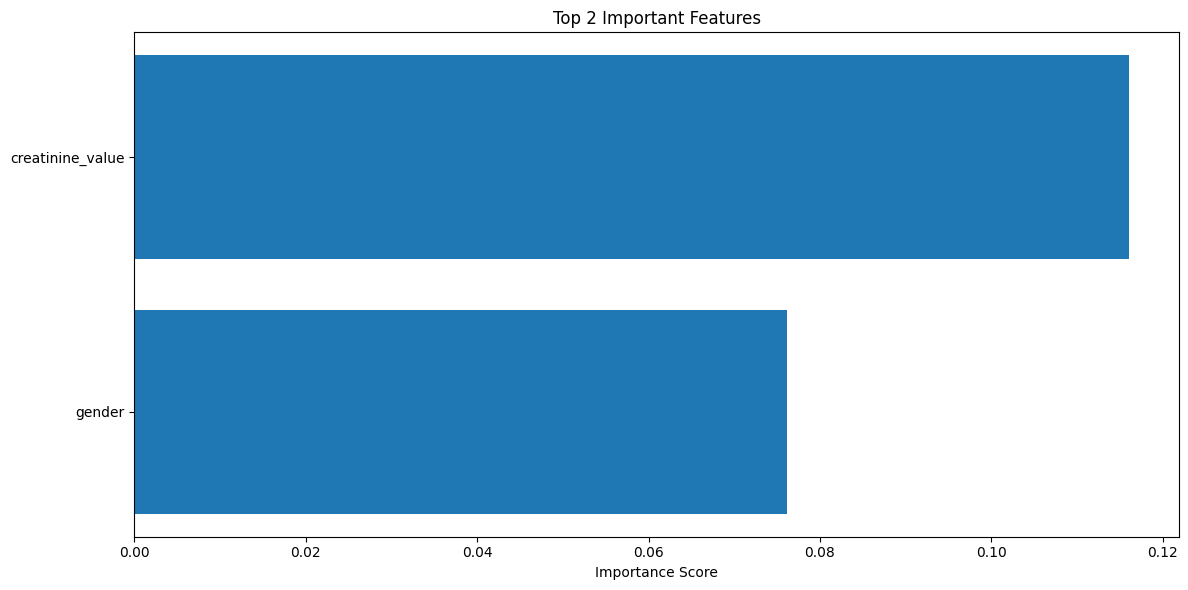


Feature Importance for Model 2:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 91.75it/s]


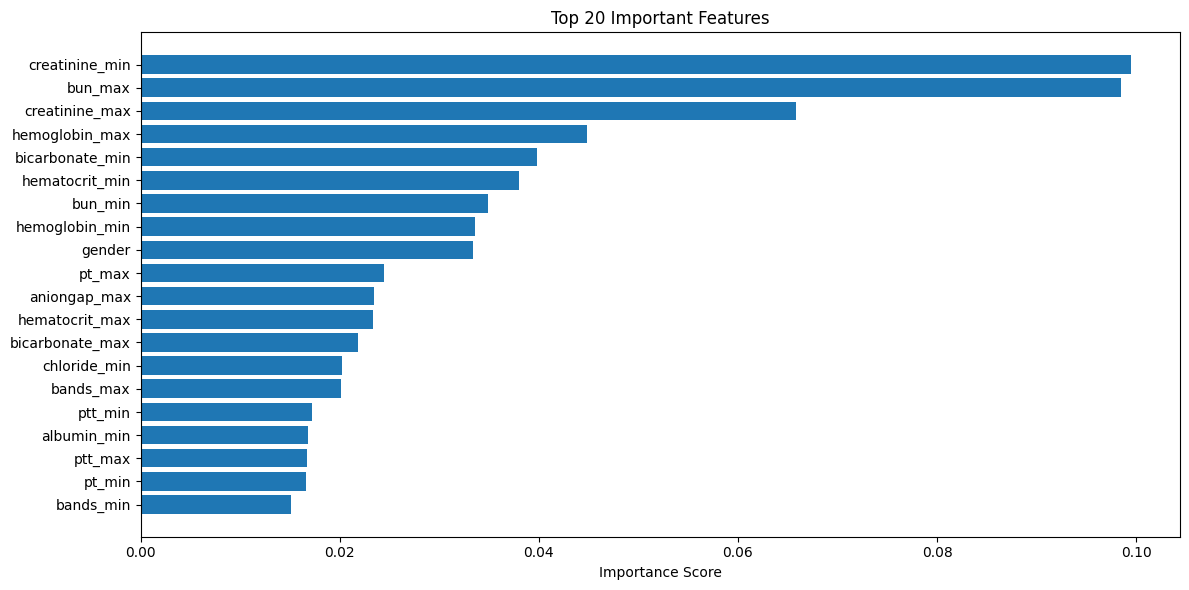


最终验证集类别分布 - 负类: 10007, 正类: 11329

Final Ensemble Performance:
AUC: 0.8926
Accuracy: 0.8112
Precision: 0.8479
Recall: 0.7853
F1: 0.8154


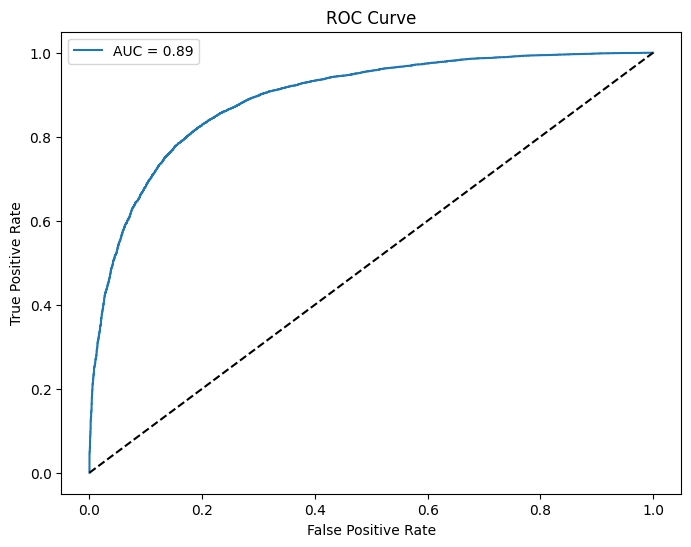

In [30]:
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score,
                             roc_curve)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import (DataLoader, TensorDataset,
                              WeightedRandomSampler)
import matplotlib.pyplot as plt
from torchvision.transforms import Compose
from tqdm import tqdm

# 固定随机种子
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# --------------------------
# 时间序列增强模块
# --------------------------
class TemporalAugmentation:
    """时间序列数据增强"""
    def __init__(self, sigma=0.1, p=0.5):
        self.sigma = sigma  # 噪声强度
        self.p = p  # 应用概率

    def __call__(self, x):
        if np.random.rand() < self.p:
            noise = torch.randn_like(x) * self.sigma
            return x + noise
        return x

# --------------------------
# 残差块模块（改进版）
# --------------------------
class ResidualBlock(nn.Module):
    """带通道注意力机制的残差块"""
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=3,
                               padding=1, bias=False)
        self.bn2 = nn.BatchNorm1d(out_channels)

        # 通道注意力机制
        self.ca = nn.Sequential(
            nn.AdaptiveAvgPool1d(1),
            nn.Conv1d(out_channels, out_channels // 8, 1),
            nn.ReLU(),
            nn.Conv1d(out_channels // 8, out_channels, 1),
            nn.Sigmoid()
        )

        self.downsample = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv1d(in_channels, out_channels, 1,
                          stride=stride, bias=False),
                nn.BatchNorm1d(out_channels)
            )

    def forward(self, x):
        identity = self.downsample(x)
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)

        # 通道注意力
        ca_weight = self.ca(out)
        out = out * ca_weight

        out += identity
        out = self.relu(out)
        return out

# --------------------------
# 改进的CNN模型
# --------------------------
class DynamicCNN(nn.Module):
    """带数据增强和时间感知的CNN"""
    def __init__(self, input_dim):
        super().__init__()
        self.input_dim = input_dim

        # 数据增强层
        self.augment = Compose([TemporalAugmentation(sigma=0.05, p=0.3)])

        # 特征预处理
        self.preprocess = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.BatchNorm1d(16),
            nn.GELU()
        )

        # 残差卷积模块
        self.conv_layers = nn.Sequential(
            nn.Conv1d(1, 16, 3, padding=1),
            ResidualBlock(16, 16),
            nn.MaxPool1d(2),
            ResidualBlock(16, 32),
            nn.AdaptiveAvgPool1d(8)
        )

        # 动态计算全连接输入维度
        with torch.no_grad():
            dummy = torch.randn(2, input_dim)
            dummy = self.preprocess(dummy).unsqueeze(1)
            dummy = self.conv_layers(dummy)
            self.fc_input = dummy.view(dummy.size(0), -1).shape[1]

        # 分类器
        self.classifier = nn.Sequential(
            nn.Linear(self.fc_input, 64),
            nn.GELU(),
            nn.Dropout(0.5),
            nn.Linear(64, 1)
        )

    def forward(self, x, augment=True):
        if self.training and augment:
            x = self.augment(x)
        x = self.preprocess(x).unsqueeze(1)
        features = self.conv_layers(x).view(x.size(0), -1)
        return self.classifier(features).squeeze(1)

# --------------------------
# 注意力融合模块
# --------------------------
class AttentionFusion(nn.Module):
    """基于注意力的模型融合"""
    def __init__(self, modelA, modelB):
        super().__init__()
        self.modelA = modelA
        self.modelB = modelB
        self.attention = nn.Sequential(
            nn.Linear(2, 8),
            nn.Tanh(),
            nn.Linear(8, 2),
            nn.Softmax(dim=1)
        )

    def forward(self, x1, x2):
        with torch.no_grad():
            logitA = self.modelA(x1)
            logitB = self.modelB(x2)
        concat_logits = torch.stack([logitA, logitB], dim=1)
        weights = self.attention(concat_logits)
        probA = torch.sigmoid(logitA)
        probB = torch.sigmoid(logitB)
        return (weights[:, 0] * probA) + (weights[:, 1] * probB)

# --------------------------
# 模型解释模块
# --------------------------
def feature_importance(model, X, feature_names, n_samples=1000):
    model.eval()
    baseline = torch.mean(X, dim=0, keepdim=True)
    delta_list = []
    
    # 确保特征数量与特征名称数量一致
    if X.shape[1] != len(feature_names):
        print(f"警告：特征数量 ({X.shape[1]}) 与特征名称数量 ({len(feature_names)}) 不匹配")
        print("可能原因：数据预处理时某些列未被正确移除或加载")
        return
    
    with torch.no_grad():
        for i in tqdm(range(X.shape[1])):
            perturbed = X.clone()
            perturbed[:, i] = baseline[0, i]
            orig_output = torch.sigmoid(model(X))
            perturbed_output = torch.sigmoid(model(perturbed))
            delta = torch.mean(torch.abs(orig_output - perturbed_output)).item()
            delta_list.append(delta)

    # 动态确定显示数量
    display_num = min(20, len(delta_list))  # 取特征数量和前20中的较小值
    indices = np.argsort(delta_list)[::-1][:display_num]  # 只取实际存在的索引
    
    plt.figure(figsize=(12, 6))
    plt.barh(range(display_num), [delta_list[i] for i in indices][::-1])
    plt.yticks(range(display_num), [feature_names[i] for i in indices][::-1])
    plt.xlabel('Importance Score')
    plt.title(f'Top {display_num} Important Features')
    plt.tight_layout()
    plt.show()

# --------------------------
# 训练评估模块（优化版）
# --------------------------
def train_and_evaluate(model, train_loader, val_loader, optimizer, criterion,
                       scheduler=None, epochs=30, save_path='best_model.pth'):
    history = {'train_loss': [], 'val_auc': [], 'val_f1': [],
               'val_accuracy': [], 'val_precision': []}
    best_auc = 0
    early_stop = EarlyStopper(patience=10)

    for epoch in range(epochs):
        # 训练阶段
        model.train()
        train_loss = 0
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            outputs = model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        history['train_loss'].append(train_loss)

        # 验证阶段
        model.eval()
        y_true, y_probs = [], []
        with torch.no_grad():
            for X, y in val_loader:
                X = X.to(device)
                outputs = model(X)
                y_true.extend(y.cpu().numpy())
                y_probs.extend(torch.sigmoid(outputs).cpu().numpy())

        # 计算指标
        auc = roc_auc_score(y_true, y_probs)
        preds = np.round(y_probs)
        f1 = f1_score(y_true, preds)
        accuracy = accuracy_score(y_true, preds)
        precision = precision_score(y_true, preds)

        history['val_auc'].append(auc)
        history['val_f1'].append(f1)
        history['val_accuracy'].append(accuracy)
        history['val_precision'].append(precision)

        # 学习率调度
        if scheduler:
            if isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                scheduler.step(auc)
            else:
                scheduler.step()

        print(f"Epoch {epoch + 1}/{epochs}")
        print(f"Train Loss: {train_loss:.4f}")
        print(f"Val AUC: {auc:.4f} | F1: {f1:.4f} | Accuracy: {accuracy:.4f} | Precision: {precision:.4f}")

        # 保存最佳模型
        if auc > best_auc:
            best_auc = auc
            torch.save(model.state_dict(), save_path)
            print(f"Saved new best model with AUC: {auc:.4f}")

        if early_stop(auc):
            print("Early stopping triggered!")
            break

    model.load_state_dict(torch.load(save_path))
    return model, history

# --------------------------
# 主流程
# --------------------------
def main():
    # 加载数据
    df1 = pd.read_csv('./data/cleaned_jigan1.csv')
    df2 = pd.read_csv('./data/cleaned_labs_first_day1.csv')
    target = 'match_flag'

    # 数据对齐
    common_ids = np.intersect1d(df1['hadm_id'], df2['hadm_id'])  # 假设存在唯一标识列
    df1 = df1[df1['hadm_id'].isin(common_ids)].sort_values('hadm_id').reset_index(drop=True)
    df2 = df2[df2['hadm_id'].isin(common_ids)].sort_values('hadm_id').reset_index(drop=True)

    # 特征工程
    feature_names1 = df1.drop(columns=[target, 'hadm_id']).columns.tolist()  # 提取特征名称
    feature_names2 = df2.drop(columns=[target, 'hadm_id']).columns.tolist()
    X1 = df1.drop(columns=[target, 'hadm_id']).values.astype(np.float32)  # 移除标识列和目标列
    X2 = df2.drop(columns=[target, 'hadm_id']).values.astype(np.float32)
    y = df1[target].values.astype(np.float32)

    # 添加数据完整性检查
    print("\n数据完整性验证：")
    print(f"X1样本数: {len(X1)}, 特征数: {X1.shape[1]}, 特征名称数: {len(feature_names1)}")
    print(f"X2样本数: {len(X2)}, 特征数: {X2.shape[1]}, 特征名称数: {len(feature_names2)}")
    print(f"正类比例: {np.mean(y):.2%}")
    assert len(X1) == len(X2) == len(y), "特征与标签数量不匹配"
    assert X1.shape[1] == len(feature_names1), "X1 特征数量与特征名称不匹配"
    assert X2.shape[1] == len(feature_names2), "X2 特征数量与特征名称不匹配"

    # 训练模型1
    print("\nTraining Model 1...")
    dataset1 = TensorDataset(torch.FloatTensor(X1), torch.FloatTensor(y))
    train_loader1, val_loader1 = create_loaders(dataset1)
    model1 = DynamicCNN(X1.shape[1]).to(device)
    optimizer1 = optim.Adam(model1.parameters(), lr=0.001, weight_decay=1e-4)
    criterion1 = nn.BCEWithLogitsLoss(pos_weight=calc_pos_weight(y))
    scheduler1 = optim.lr_scheduler.ReduceLROnPlateau(optimizer1, mode='max', factor=0.1, patience=3)
    model1, hist1 = train_and_evaluate(model1, train_loader1, val_loader1, optimizer1,
                                     criterion1, scheduler=scheduler1, save_path='best_model1.pth')

    # 训练模型2
    print("\nTraining Model 2...")
    dataset2 = TensorDataset(torch.FloatTensor(X2), torch.FloatTensor(y))
    train_loader2, val_loader2 = create_loaders(dataset2)
    model2 = DynamicCNN(X2.shape[1]).to(device)
    optimizer2 = optim.Adam(model2.parameters(), lr=0.001, weight_decay=1e-4)
    criterion2 = nn.BCEWithLogitsLoss(pos_weight=calc_pos_weight(y))
    scheduler2 = optim.lr_scheduler.ReduceLROnPlateau(optimizer2, mode='max', factor=0.1, patience=3)
    model2, hist2 = train_and_evaluate(model2, train_loader2, val_loader2, optimizer2,
                                     criterion2, scheduler=scheduler2, save_path='best_model2.pth')

    # 加载最佳模型
    model1.load_state_dict(torch.load('best_model1.pth'))
    model2.load_state_dict(torch.load('best_model2.pth'))

    # 训练融合模型
    print("\nTraining Fusion Model...")
    fusion_model = AttentionFusion(model1, model2).to(device)
    optimizer = optim.Adam(fusion_model.parameters(), lr=0.001)
    scheduler_fusion = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
    dataset = TensorDataset(torch.FloatTensor(X1), torch.FloatTensor(X2), torch.FloatTensor(y))
    train_loader = DataLoader(dataset, batch_size=128, shuffle=True)

    for epoch in range(20):
        total_loss = 0
        fusion_model.train()
        for X1_batch, X2_batch, y_batch in train_loader:
            X1_batch, X2_batch = X1_batch.to(device), X2_batch.to(device)
            y_batch = y_batch.to(device)

            optimizer.zero_grad()
            probs = fusion_model(X1_batch, X2_batch)
            loss = nn.BCELoss()(probs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        scheduler_fusion.step()
        print(f"Epoch {epoch + 1}: Loss={total_loss / len(train_loader):.4f}, LR={optimizer.param_groups[0]['lr']:.6f}")

    # 模型解释与评估
    print("\nFeature Importance for Model 1:")
    feature_importance(model1, torch.FloatTensor(X1[:1000]).to(device), feature_names1)
    print("\nFeature Importance for Model 2:")
    feature_importance(model2, torch.FloatTensor(X2[:1000]).to(device), feature_names2)
    evaluate_ensemble(fusion_model, X1, X2, y)

# --------------------------
# 辅助函数
# --------------------------
class EarlyStopper:
    def __init__(self, patience=10, min_delta=0.005):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_score = None

    def __call__(self, score):
        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score + self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                return True
        else:
            self.best_score = score
            self.counter = 0
        return False

def create_loaders(dataset, val_ratio=0.2):
    # 使用分层划分
    y = dataset.tensors[1].numpy()
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    train_idx, val_idx = next(skf.split(np.zeros(len(y)), y))
    
    train_dataset = torch.utils.data.Subset(dataset, train_idx)
    val_dataset = torch.utils.data.Subset(dataset, val_idx)
    
    # 类别平衡采样
    y_train = y[train_idx]
    sampler = WeightedRandomSampler(
        weights=calc_sample_weights(y_train),
        num_samples=len(train_dataset),
        replacement=True
    )
    
    train_loader = DataLoader(train_dataset, batch_size=64, sampler=sampler)
    val_loader = DataLoader(val_dataset, batch_size=64)
    return train_loader, val_loader

def calc_pos_weight(y):
    pos = np.sum(y)
    neg = len(y) - pos
    return torch.tensor([neg / pos]).to(device) if pos > 0 else torch.tensor([1.0]).to(device)

def calc_sample_weights(y):
    class_counts = np.bincount(y.astype(int))
    class_weights = 1. / class_counts
    return torch.tensor([class_weights[int(label)] for label in y])

def evaluate_ensemble(model, X1, X2, y):
    # 创建数据集时确保顺序一致
    dataset = TensorDataset(torch.FloatTensor(X1), torch.FloatTensor(X2), torch.FloatTensor(y))
    loader = DataLoader(dataset, batch_size=256, shuffle=False)  # 必须关闭shuffle
    
    model.eval()
    probs, truths = [], []
    with torch.no_grad():
        for X1_batch, X2_batch, y_batch in loader:
            X1_batch, X2_batch = X1_batch.to(device), X2_batch.to(device)
            batch_probs = model(X1_batch, X2_batch).cpu().numpy()
            probs.extend(batch_probs)
            truths.extend(y_batch.cpu().numpy())  # 直接使用loader提供的标签
    
    # 转换为numpy数组并验证
    truths = np.array(truths)
    probs = np.array(probs)
    print(f"\n最终验证集类别分布 - 负类: {np.sum(truths==0)}, 正类: {np.sum(truths==1)}")
    
    # 检查类别分布
    unique_classes = np.unique(truths)
    if len(unique_classes) == 1:
        print("\n警告：验证集只包含单一类别，无法计算AUC")
        class_dist = {0: np.sum(truths==0), 1: np.sum(truths==1)}
        print(f"类别分布: {class_dist}")
        return
    
    # 计算评估指标
    preds = np.round(probs)
    print("\nFinal Ensemble Performance:")
    try:
        auc = roc_auc_score(truths, probs)
        print(f"AUC: {auc:.4f}")
    except ValueError as e:
        print(f"AUC计算失败: {str(e)}")
        auc = 0
    
    print(f"Accuracy: {accuracy_score(truths, preds):.4f}")
    print(f"Precision: {precision_score(truths, preds):.4f}")
    print(f"Recall: {recall_score(truths, preds):.4f}")
    print(f"F1: {f1_score(truths, preds):.4f}")

    # 绘制ROC曲线
    if auc > 0:
        fpr, tpr, _ = roc_curve(truths, probs)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()

if __name__ == "__main__":
    main()